#STRUCTURAL HAZARD

In [ ]:
import re

latencies = {
    # Define operation latencies for EX stage (cycles)
    'ADD': 1,   # 1 cycle in EX stage
    'SUB': 1,   # 1 cycle in EX stage
    'MUL': 5,   # 5 cycles in EX stage
    'DIV': 10,  # 10 cycles in EX stage
    'ORR': 1,
    'AND': 1,
    'EOR': 1,
    'NOT': 1,

    # Define operation latencies for MEM stage (cycles)
    'LDR': 2,   # 2 cycles in MEM stage
    'STR': 2,   # 2 cycles in MEM stage
}

# Function to insert NOPs for structural hazards
def insert_nops_for_structural_hazards(instructions):
    updated_instructions = []
    total_cycles = 5
    # previous_delay = 0  # Track the previous instruction's EX stage delay
    prev_accum_latency = 0

    # Process each instruction
    for i, instruction in enumerate(instructions):
        # Insert NOPs if necessary based on structural hazard
        if i > 0:  # For every instruction except the first
            prev_instr = instructions[i-1]
            prev_latency = latencies[prev_instr['op']]
            # current_latency = latencies[instruction['op']]

            # Structural hazard occurs if EX delay of previous instruction is greater than current instruction's EX delay
            # Calculate NOPs based on the new formula
            prev_accum_latency += prev_latency - 1

            for _ in range(prev_accum_latency):
                updated_instructions.append({'op': 'NOP', 'cycles': 1, 'src1': None, 'src2': None, 'dest': None})
                # total_cycles += 1  # Each NOP takes 1 cycle

        # Add the actual instruction
        updated_instructions.append(instruction)

        # Add cycles for each stage (IF, ID, EX, MEM, WB)
        total_cycles += (latencies[instruction['op']] - 1)  # Add remaining cycles for EX stage

    # Add cycles for each stage (IF, ID, EX, MEM, WB)
    total_cycles += len(instructions) - 1

    return updated_instructions, total_cycles

# Function to parse assembly code and create instructions
def parse_assembly(assembly):
    instructions = []

    for line in assembly:
        # Match instructions using regex
        # match = re.match(r'(\w+)\s+(\w+),\s*(\w+),\s*(\w+)', line.strip())
        # match = re.match(r'^(ADD|SUB|MUL|DIV|ORR|AND|EOR|NOT|LDR|STR)\s+(R\d+),\s*(?:(R\d+)|\[(\d+|R\d+)\])(?:,\s*(?:(R\d+)|\[(\d+|R\d+)\]))?$', line.strip())
        # match = re.match(r'^(ADD|SUB|MUL|DIV|ORR|AND|EOR|NOT|LDR|STR)\s+(R\d+),\s*(?:(R\d+)|\[(R\d+|\d+)\]|(\d+)),\s*(?:(R\d+)|\[(R\d+|\d+)\]|(\d+))$', line.strip())
        match = re.match(r'^(ADD|SUB|MUL|DIV|ORR|AND|EOR|NOT|LDR|STR)\s+(R\d+),\s*(\S+),\s*(\S+)$', line.strip())

        if match:
            op = match.group(1)
            dest = match.group(2)
            src1 = match.group(3)
            src2 = match.group(4)
            instructions.append({
                'op': op,
                'dest': dest,
                'src1': src1,
                'src2': src2
            })

    return instructions

# Main function to handle input and output
def main():
    # Sample assembly input
    # assembly_code = [
    #     "EOR R1, R1, R3",   # XOR instruction
    #     "ADD R1, 1000",
    #     "LDR R2, [R1]", # LOAD instruction
    #     "STR R2, [R1]"  # STORE instruction
    # ]
    # assembly_code = [
    #     "LDR R2, [1000]", # LOAD instruction
    #     "STR R2, [1000]" # STORE instruction
    # ]
    assembly_code = [
        "ADD R1, R2, R3",  # ADD instruction
        "DIV R4, R5, R6",  # DIV instruction
        "MUL R7, R8, R9",  # MUL instruction
        "SUB R10, R11, R12",   # SUB instruction
        "MUL R13, R14, R15",
        "ADD R16, R17, R18"
    ]
    # assembly_code = [
    #     "MUL R7, R8, R9",  # MUL instruction
    #     "MUL R13, R14, R15",
    # ]

    # Parse the assembly code
    instructions = parse_assembly(assembly_code)

    # Simulate the execution with NOP insertion and hazard handling
    updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)

    # Print the updated instructions with NOPs
    print("Updated Code with NOPs:")
    for instr in updated_instructions:
        if instr['op'] == 'NOP':
            print(f"{instr['op']}")
        else:
            if instr['src1'] is None:
              print(f"{instr['op']} {instr['dest']}, {instr['src2']}")
            else:
              print(f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    # Output the total cycles
    print(f"\nTotal clock cycles: {total_cycles}")

if __name__ == "__main__":
    main()

Updated Code with NOPs:
ADD R1, R2, R3
DIV R4, R5, R6
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
MUL R7, R8, R9
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
SUB R10, R11, R12
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
MUL R13, R14, R15
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
ADD R16, R17, R18

Total clock cycles: 27


In [ ]:
import re

latencies = {
    # Define operation latencies for EX stage (cycles)
    'ADD': 1,   # 1 cycle in EX stage
    'SUB': 1,   # 1 cycle in EX stage
    'MUL': 5,   # 5 cycles in EX stage
    'DIV': 10,  # 10 cycles in EX stage
    'ORR': 1,
    'AND': 1,
    'EOR': 1,
    'NOT': 1,
    'MOV': 1,

    # Define operation latencies for MEM stage (cycles)
    'LDR': 2,   # 2 cycles in MEM stage
    'STR': 2,   # 2 cycles in MEM stage
}

# Function to insert NOPs for structural hazards
def insert_nops_for_structural_hazards(instructions):
    updated_instructions = []
    total_cycles = 0
    # previous_delay = 0  # Track the previous instruction's EX stage delay
    prev_accum_latency = 0

    # Process each instruction
    for i, instruction in enumerate(instructions):
        # Insert NOPs if necessary based on structural hazard
        if i > 0:  # For every instruction except the first
            prev_instr = instructions[i-1]
            prev_latency = latencies[prev_instr['op']]
            # current_latency = latencies[instruction['op']]

            # Structural hazard occurs if EX delay of previous instruction is greater than current instruction's EX delay
            # Calculate NOPs based on the new formula
            prev_accum_latency += prev_latency - 1

            for _ in range(prev_accum_latency):
                updated_instructions.append({'op': 'NOP', 'cycles': 1, 'src1': None, 'src2': None, 'dest': None})
                # total_cycles += 1  # Each NOP takes 1 cycle

        # Add the actual instruction
        updated_instructions.append(instruction)

        # Add cycles for each stage (IF, ID, EX, MEM, WB)
        total_cycles += (latencies[instruction['op']] - 1)  # Add remaining cycles for EX stage

    # Add cycles for each stage (IF, ID, EX, MEM, WB)
    total_cycles += len(instructions) - 1

    return updated_instructions, total_cycles

# Function to parse assembly code and create instructions
import re

def parse_assembly(assembly):
    instructions = []

    # Define regex patterns for parsing the instructions
    for line in assembly:
        line = line.strip()  # Clean up the line (remove extra spaces)

        # Regex pattern for MOV (only 2 operands)
        match_mov = re.match(r'^(MOV)\s+(R\d+),\s*(\S+)$', line)

        # Regex pattern for Arithmetic Operations: ADD, SUB, EOR, etc.
        match_arithmetic = re.match(
            r'^(ADD|SUB|MUL|DIV|ORR|AND|EOR|NOT)\s+(R\d+),\s*(\S+),\s*(\S+)$', line)

        # Regex pattern for LDR and STR (memory operations)
        match_memory = re.match(
            r'^(LDR|STR)\s+(R\d+),\s*\[(\S+)\]$', line)

        if match_mov:
            # MOV operation (only 2 operands)
            op = match_mov.group(1)
            dest = match_mov.group(2)
            src1 = match_mov.group(3)

            # If src1 is a register, keep it as is. If it's an immediate, keep as integer.
            if src1.isdigit():
                src1 = int(src1)
            elif src1.startswith('[') and src1.endswith(']'):
                src1 = src1.strip('[]')

            instructions.append({
                'op': op,
                'dest': dest,
                'src1': src1,
                'src2': None  # MOV has no src2 operand
            })

        elif match_arithmetic:
            # Arithmetic Operation (e.g., ADD, EOR, etc.)
            op = match_arithmetic.group(1)
            dest = match_arithmetic.group(2)
            src1 = match_arithmetic.group(3)
            src2 = match_arithmetic.group(4)

            # If src1 or src2 is an immediate value, convert it to an integer
            if src1.isdigit():
                src1 = int(src1)
            elif src1.startswith('[') and src1.endswith(']'):
                src1 = src1.strip('[]')

            if src2.isdigit():
                src2 = int(src2)
            elif src2.startswith('[') and src2.endswith(']'):
                src2 = src2.strip('[]')

            instructions.append({
                'op': op,
                'dest': dest,
                'src1': src1,
                'src2': src2
            })

        elif match_memory:
            # Memory Operation (LDR or STR)
            op = match_memory.group(1)
            dest = match_memory.group(2)
            src1 = match_memory.group(3)

            # src2 is not used in LDR/STR, it remains None
            src2 = None

            # Handle the memory address (either register or immediate value)
            if src1.isdigit():
                src1 = int(src1)
            elif src1.startswith('[') and src1.endswith(']'):
                src1 = src1.strip('[]')

            instructions.append({
                'op': op,
                'dest': dest,
                'src1': src1,
                'src2': src2
            })

    return instructions

# Main function to handle input and output
def main():
    # Sample assembly input
    # structural hazard
    # assembly_code = [
    #     "EOR R1, R1, R3",   # XOR instruction
    #     "ADD R1, R1, 1000",
    #     "LDR R2, [R1]", # LOAD instruction
    #     "STR R2, [R1]"  # STORE instruction
    # ]
    # assembly_code = [
    #     "LDR R2, [1000]", # LOAD instruction
    #     "STR R2, [1000]" # STORE instruction
    # ]
    assembly_code = [
        "ADD R1, R2, R3",  # ADD instruction
        "DIV R4, R5, R6",  # DIV instruction
        "MUL R7, R8, R9",  # MUL instruction
        "SUB R10, R11, R12",   # SUB instruction
        "MUL R13, R14, R15",
        "ADD R16, R17, R18"
    ]
    # assembly_code = [
    #     "MUL R7, R8, R9",  # MUL instruction
    #     "MUL R13, R14, R15",
    # ]

    # raw
    # assembly_code = [
    #     "MOV R1, 1000",
    #     "LDR R2, [R1]", # LOAD instruction
    #     "STR R2, [R1]"  # STORE instruction
    # ]

    # Parse the assembly code
    instructions = parse_assembly(assembly_code)

    # Simulate the execution with NOP insertion and hazard handling
    updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)

    # Print the updated instructions with NOPs
    print("Updated Code with NOPs:")
    for instr in updated_instructions:
        if instr['op'] == 'NOP':
            print(f"{instr['op']}")
        else:
            if instr['op'] in ['LDR', 'STR']:
              print(f"{instr['op']} {instr['dest']}, [{instr['src1']}]")
            elif instr['op'] == 'MOV':
              print(f"{instr['op']} {instr['dest']}, {instr['src1']}")
            else:
              print(f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    # Output the total cycles
    print(f"\nTotal clock cycles: {total_cycles + 5}")

if __name__ == "__main__":
    main()

Updated Code with NOPs:
ADD R1, R2, R3
DIV R4, R5, R6
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
MUL R7, R8, R9
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
SUB R10, R11, R12
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
MUL R13, R14, R15
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
ADD R16, R17, R18

Total clock cycles: 27


#WAR and WAW HAZARD

---

In [ ]:
class Instruction:
    def __init__(self, opcode, operands, stages, latency):
        self.opcode = opcode
        self.operands = operands
        self.stages = stages  # List of stages for each instruction type
        self.latency = latency  # Total latency for each instruction
        self.issue_cycle = None
        self.stage_cycles = {stage: None for stage in self.stages}  # Cycle for each stage
        self.complete_cycle = None

class Processor:
    def __init__(self):
        self.instructions = []
        self.current_cycle = 0
        self.pipeline = ['IF', 'ID', 'EX1', 'EX2', 'MEM', 'WB']  # Typical pipeline stages
        self.functional_units = {
            'LD': 1,
            'IADD': 6,    # 1 cycle for IF, 1 cycle for ID, 4 cycles for EX1
            'IMUL': 12,   # 2 cycles for EX1, 2 cycles for EX2
            'FADD': 18,   # 2 cycles for EX1, 2 cycles for EX2
            'FMUL': 30,   # 2 cycles for EX1, 2 cycles for EX2
            'ST': 1,
            'NOP': 1
        }

    def add_instruction(self, instruction):
        self.instructions.append(instruction)

    def simulate(self):
        # Issue instructions in order
        for idx, instruction in enumerate(self.instructions):
            instruction.issue_cycle = self.current_cycle
            # Set stage cycles based on instruction type and functional unit latency
            for i, stage in enumerate(self.pipeline):
                if stage == 'IF':
                    instruction.stage_cycles[stage] = self.current_cycle
                else:
                    # Calculate the cycle for each stage based on latency
                    instruction.stage_cycles[stage] = instruction.stage_cycles[self.pipeline[i - 1]] + 1
            self.current_cycle += 1  # Move to the next cycle for the next instruction

        # Now, compute the total complete cycle (WB stage completion)
        for instruction in self.instructions:
            instruction.complete_cycle = instruction.stage_cycles['WB']
            self.current_cycle = max(self.current_cycle, instruction.complete_cycle)

    def display_execution(self):
        print("Cycle | Instruction | Functional Unit | Issue Cycle | Stage Cycles")
        print("----------------------------------------------------------")
        for instruction in self.instructions:
            print(f"{instruction.issue_cycle:5} | {instruction.opcode:12} | {instruction.operands:16} | {instruction.issue_cycle:12} | {instruction.stage_cycles}")

    def total_cycles(self):
        return self.current_cycle

# Creating instructions based on the example program
program = [
    Instruction('LD', 'R1, 0(R2)', ['IF', 'ID', 'EX1', 'MEM', 'WB'], 1),    # Load instruction
    Instruction('IADD', 'R3, R1, R4', ['IF', 'ID', 'EX1', 'EX2', 'WB'], 6),  # Integer addition
    Instruction('IMUL', 'R5, R3, R6', ['IF', 'ID', 'EX1', 'EX2', 'WB'], 12), # Integer multiplication
    Instruction('FADD', 'R7, R5, R8', ['IF', 'ID', 'EX1', 'EX2', 'WB'], 18), # Floating point addition
    Instruction('FMUL', 'R9, R7, R10', ['IF', 'ID', 'EX1', 'EX2', 'WB'], 30),# Floating point multiplication
    Instruction('ST', '0(R11), R9', ['IF', 'ID', 'EX1', 'MEM', 'WB'], 1),    # Store instruction
    Instruction('NOP', '', ['IF', 'ID', 'EX1', 'MEM', 'WB'], 1)               # No operation
]

# Initialize Processor
processor = Processor()

# Add instructions to the processor
for instruction in program:
    processor.add_instruction(instruction)

# Simulate the execution of the program
processor.simulate()

# Display the execution timeline
processor.display_execution()

# Print total cycles
print(f"\nTotal clock cycles taken for execution: {processor.total_cycles()}")

Cycle | Instruction | Functional Unit | Issue Cycle | Stage Cycles
----------------------------------------------------------
    0 | LD           | R1, 0(R2)        |            0 | {'IF': 0, 'ID': 1, 'EX1': 2, 'MEM': 4, 'WB': 5, 'EX2': 3}
    1 | IADD         | R3, R1, R4       |            1 | {'IF': 1, 'ID': 2, 'EX1': 3, 'EX2': 4, 'WB': 6, 'MEM': 5}
    2 | IMUL         | R5, R3, R6       |            2 | {'IF': 2, 'ID': 3, 'EX1': 4, 'EX2': 5, 'WB': 7, 'MEM': 6}
    3 | FADD         | R7, R5, R8       |            3 | {'IF': 3, 'ID': 4, 'EX1': 5, 'EX2': 6, 'WB': 8, 'MEM': 7}
    4 | FMUL         | R9, R7, R10      |            4 | {'IF': 4, 'ID': 5, 'EX1': 6, 'EX2': 7, 'WB': 9, 'MEM': 8}
    5 | ST           | 0(R11), R9       |            5 | {'IF': 5, 'ID': 6, 'EX1': 7, 'MEM': 9, 'WB': 10, 'EX2': 8}
    6 | NOP          |                  |            6 | {'IF': 6, 'ID': 7, 'EX1': 8, 'MEM': 10, 'WB': 11, 'EX2': 9}

Total clock cycles taken for execution: 11


---

In [ ]:
import re

# Define pipeline stages and latencies
pipeline_stages = {
    # integer
    'IADD': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'ISUB': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'IMUL': {'IF': 1, 'ID': 1, 'MUL': 12, 'WB': 1},
    'IDIV': {'IF': 1, 'ID': 1, 'DIV': 24, 'WB': 1},

    # floating
    'FADD': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FSUB': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FMUL': {'IF': 1, 'ID': 1, 'FMUL': 30, 'WB': 1},
    'FDIV': {'IF': 1, 'ID': 1, 'FDIV': 60, 'WB': 1},

    # logical operations
    'AND': {'IF': 1, 'ID': 1, 'AND': 30, 'WB': 1},
    'OR': {'IF': 1, 'ID': 1, 'OR': 30, 'WB': 1},
    'XOR': {'IF': 1, 'ID': 1, 'XOR': 30, 'WB': 1},
    'NOT': {'IF': 1, 'ID': 1, 'NOT': 30, 'WB': 1},

    # load and store
    'LD': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},
    'ST': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},

    # NOP
    'NOP': {'IF': 1},

    # move
    'MOV': {'IF': 1, 'ID': 1, 'MOV': 1, 'WB': 1}
}

def get_functional_unit_and_latency(stages):
    functional_units = ['ADD', 'MUL', 'DIV', 'FADD', 'FMUL', 'FDIV', 'MEM']
    for stage, latency in stages.items():
        if stage in functional_units:
            return stage, latency
    return None, None  # No functional unit found

def display_clock_cycle_execution(updated_instructions, total_cycles):
    # Initialize a timeline for each instruction
    timeline = {}
    for i, instr in enumerate(updated_instructions):
        timeline[i] = [' '] * total_cycles  # Initialize with empty spaces for all clock cycles

    # Track the start cycle for each instruction
    for i, instr in enumerate(updated_instructions):
        stages = instr['stages']
        current_cycle = i  # Start at cycle i (0-based index)
        for stage, latency in stages.items():
            # Fill the timeline for the current stage
            for cycle in range(current_cycle, current_cycle + latency):
                if cycle < total_cycles:  # Ensure we don't exceed the total_cycles limit
                    timeline[i][cycle] = stage
            current_cycle += latency

    # Determine maximum stage name length for uniform spacing
    max_stage_length = max(len(stage) for instr in updated_instructions for stage in instr['stages'])
    max_cycle_length = len(str(total_cycles))  # Maximum length of clock cycle numbers

    # Define column width based on the maximum length
    column_width = max(max_stage_length, max_cycle_length) + 2  # Add padding

    # Determine the maximum instruction name length for dynamic spacing
    max_instr_length = max(
        len(f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
        if instr['op'] not in ['LD', 'ST', 'NOP']
        else len(f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]")
        if instr['op'] in ['LD', 'ST']
        else len(f"{i + 1}: NOP")
        for i, instr in enumerate(updated_instructions)
    )

    # Print the timeline
    print("Clock Cycle Execution:")
    print(" " * (max_instr_length + 2) + "|", end="")
    for cycle in range(1, total_cycles + 1):
        print(f" {cycle:^{column_width}} |", end="")  # Center-align clock cycles
    print()

    for i, instr in enumerate(updated_instructions):
        # Display the instruction name with index
        if instr['op'] in ['LD', 'ST']:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]"
        elif instr['op'] == 'NOP':
            instruction_name = f"{i + 1}: NOP"
        else:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}"

        # Print the instruction name and its stages
        print(f"{instruction_name: <{max_instr_length}} |", end="")
        for cycle in range(total_cycles):
            stage = timeline[i][cycle]
            print(f" {stage:^{column_width}} |", end="")  # Center-align stages
        print()

# Function to insert NOPs for structural hazards
def insert_nops_for_structural_hazards(instructions):
    updated_instructions = []
    total_cycles = 0
    prev_accum_latency = 0
    curr_latency = 0

    for i, instruction in enumerate(instructions):
        if i > 0:
            curr_instr = instructions[i]
            curr_func_unit, curr_func_latency = get_functional_unit_and_latency(curr_instr['stages'])

            # Iterate backward from i-1 to 0 to find the first conflicting instruction
            conflict_found = False
            for j in range(i - 1, -1, -1):
                prev_instr = instructions[j]
                prev_func_unit, prev_func_latency = get_functional_unit_and_latency(prev_instr['stages'])

                # Check for structural hazard (same functional unit)
                if prev_func_unit is not None and curr_func_unit == prev_func_unit:
                    conflict_found = True
                    # Update curr_latency based on the conflicting instruction's latency
                    if prev_func_latency is not None:
                        curr_latency = prev_func_latency - (i - j)
                    break  # Stop after finding the first conflict

            # If no conflict is found, reset curr_latency
            if not conflict_found:
                curr_latency = 0

            prev_accum_latency += curr_latency

            # Insert NOPs for the accumulated latency
            for _ in range(curr_latency):
                updated_instructions.append({'op': 'NOP', 'stages': pipeline_stages['NOP']})

        # Add the current instruction
        updated_instructions.append(instruction)

        # Update total_cycles
        time = sum(instruction['stages'].values())
        total_cycles = max(i + time + prev_accum_latency, total_cycles)

    return updated_instructions, total_cycles

# Function to parse assembly code
import re

def parse_assembly(assembly):
    instructions = []

    for line in assembly:
        line = line.strip()

        # Regex for arithmetic/logic instructions (e.g., IADD R1, R2, R3)
        match_arithmetic = re.match(r'^(IADD|IMUL|IDIV|FADD|FMUL|FDIV|AND|OR|XOR|NOT)\s+(R\d+),\s*(R\d+),\s*(R\d+)$', line)

        # Regex for MOV instructions (e.g., MOV R8, R7 or MOV R8, 1000)
        match_mov = re.match(r'^(MOV)\s+(R\d+),\s*(R\d+|\d+)$', line)

        # Regex for memory instructions with register or immediate address (e.g., LD R8, [R9] or LD R8, [1000])
        match_memory = re.match(r'^(LD|ST)\s+(R\d+),\s*\[(R\d+|\d+)\]$', line)

        # Regex for NOP instruction
        match_nop = re.match(r'^NOP$', line)

        if match_arithmetic:
            op = match_arithmetic.group(1)
            dest = match_arithmetic.group(2)
            src1 = match_arithmetic.group(3)
            src2 = match_arithmetic.group(4)
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': src2, 'stages': pipeline_stages[op]})

        elif match_mov:
            op = match_mov.group(1)
            dest = match_mov.group(2)
            src1 = match_mov.group(3)
            # For MOV, src2 is None
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_memory:
            op = match_memory.group(1)
            dest = match_memory.group(2)
            src1 = match_memory.group(3)
            # For LD/ST, src2 is None
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_nop:
            instructions.append({'op': 'NOP', 'dest': None, 'src1': None, 'src2': None, 'stages': pipeline_stages['NOP']})

    return instructions

# Main function
def main():
    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FMUL R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    assembly_code = [
        "IADD R1, R2, R3",
        "FDIV R4, R5, R6",
        "LD R7, [R8]",
        "ST R9, [R10]",
        "FADD R11, R12, R13",
        "FADD R14, R15, R16",
        "FADD R17, R18, R19"
    ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R7, [1000]",
    #     "IADD R1, R2, R3",
    #     "FMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    instructions = parse_assembly(assembly_code)
    updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)

    print("Updated Code with NOPs:")
    for instr in updated_instructions:
        if instr['op'] == 'NOP':
            print("NOP")
        else:
            if instr['op'] in ['LD', 'ST']:
                print(f"{instr['op']} {instr['dest']}, [{instr['src1']}]")
            else:
                print(f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    print(f"\nTotal clock cycles: {total_cycles}")


    # for i, instr in enumerate(updated_instructions):
    #     if instr['op'] in ['LD', 'ST']:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, [{instr['src1']}]")
    #     elif instr['op'] == 'NOP':
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']}")
    #     else:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
    display_clock_cycle_execution(updated_instructions, total_cycles)

if __name__ == "__main__":
    main()

Updated Code with NOPs:
IADD R1, R2, R3
FDIV R4, R5, R6
LD R7, [R8]
ST R9, [R10]
FADD R11, R12, R13
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
FADD R14, R15, R16
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
NOP
FADD R17, R18, R19

Total clock cycles: 64
Clock Cycle Execution:
                        |   1    |   2    |   3    |   4    |   5    |   6    |   7    |   8    |   9    |   10   |   11   |   12   |   13   |   14   |   15   |   16   |   17   |   18   |   19   |   20   |   21   |   22   |   23   |   24   |   25   |   26   |   27   |   28   |   29   |   30   |   31   |   32   |   33   |   34   |   35   |   36   |   37   |   38   |   39   |   40   |   41   |   42   |   43   |   44   |   45   |   46   |   47   |   48   |   49   |   50   |   51   |   52   |   53   |   54   |   55   |   56   |   57   |   58   |   59   |   60   |   61   |   62   |   63   |   64   |
1: IADD R1, R2, R3     |   IF   |   ID   |  ADD   |  ADD   |  ADD   |  ADD   

---

In [ ]:
import re

# Define pipeline stages and latencies
pipeline_stages = {
    # integer
    'IADD': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'ISUB': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'IMUL': {'IF': 1, 'ID': 1, 'MUL': 12, 'WB': 1},
    'IDIV': {'IF': 1, 'ID': 1, 'DIV': 24, 'WB': 1},

    # floating
    'FADD': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FSUB': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FMUL': {'IF': 1, 'ID': 1, 'FMUL': 30, 'WB': 1},
    'FDIV': {'IF': 1, 'ID': 1, 'FDIV': 60, 'WB': 1},

    # logical operations
    'AND': {'IF': 1, 'ID': 1, 'AND': 30, 'WB': 1},
    'OR': {'IF': 1, 'ID': 1, 'OR': 30, 'WB': 1},
    'XOR': {'IF': 1, 'ID': 1, 'XOR': 30, 'WB': 1},
    'NOT': {'IF': 1, 'ID': 1, 'NOT': 30, 'WB': 1},

    # load and store
    'LD': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},
    'ST': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},

    # NOP
    'NOP': {'IF': 1},

    # move
    'MOV': {'IF': 1, 'ID': 1, 'MOV': 1, 'WB': 1}
}

def get_functional_unit_and_latency(stages):
    functional_units = ['ADD', 'MUL', 'DIV', 'FADD', 'FMUL', 'FDIV', 'MEM']
    for stage, latency in stages.items():
        if stage in functional_units:
            return stage, latency
    return None, None  # No functional unit found

def display_clock_cycle_execution(updated_instructions, total_cycles):
    # Initialize a timeline for each instruction
    timeline = {}
    for i, instr in enumerate(updated_instructions):
        timeline[i] = [' '] * total_cycles  # Initialize with empty spaces for all clock cycles

    # Track the start cycle for each instruction
    for i, instr in enumerate(updated_instructions):
        stages = instr['stages']
        current_cycle = i  # Start at cycle i (0-based index)
        for stage, latency in stages.items():
            # Fill the timeline for the current stage
            for cycle in range(current_cycle, current_cycle + latency):
                if cycle < total_cycles:  # Ensure we don't exceed the total_cycles limit
                    timeline[i][cycle] = stage
            current_cycle += latency

    # Determine maximum stage name length for uniform spacing
    max_stage_length = max(len(stage) for instr in updated_instructions for stage in instr['stages'])
    max_cycle_length = len(str(total_cycles))  # Maximum length of clock cycle numbers

    # Define column width based on the maximum length
    column_width = max(max_stage_length, max_cycle_length) + 2  # Add padding

    # Determine the maximum instruction name length for dynamic spacing
    max_instr_length = max(
        len(f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
        if instr['op'] not in ['LD', 'ST', 'NOP']
        else len(f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]")
        if instr['op'] in ['LD', 'ST']
        else len(f"{i + 1}: NOP")
        for i, instr in enumerate(updated_instructions)
    )

    # Print the timeline
    print("Clock Cycle Execution:")
    print(" " * (max_instr_length + 2) + "|", end="")
    for cycle in range(1, total_cycles + 1):
        print(f" {cycle:^{column_width}} |", end="")  # Center-align clock cycles
    print()

    for i, instr in enumerate(updated_instructions):
        # Display the instruction name with index
        if instr['op'] in ['LD', 'ST']:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]"
        elif instr['op'] == 'NOP':
            instruction_name = f"{i + 1}: NOP"
        else:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}"

        # Print the instruction name and its stages
        print(f"{instruction_name: <{max_instr_length}} |", end="")
        for cycle in range(total_cycles):
            stage = timeline[i][cycle]
            print(f" {stage:^{column_width}} |", end="")  # Center-align stages
        print()

# Function to insert NOPs for structural hazards
def insert_nops_for_structural_hazards(instructions):
    updated_instructions = []
    total_cycles = 0
    prev_accum_latency = 0
    curr_latency = 0

    for i, instruction in enumerate(instructions):
        if i > 0:
            curr_instr = instructions[i]
            curr_func_unit, curr_func_latency = get_functional_unit_and_latency(curr_instr['stages'])

            # Iterate backward from i-1 to 0 to find the first conflicting instruction
            conflict_found = False
            for j in range(i - 1, -1, -1):
                prev_instr = instructions[j]
                prev_func_unit, prev_func_latency = get_functional_unit_and_latency(prev_instr['stages'])

                # Check for structural hazard (same functional unit)
                if prev_func_unit is not None and curr_func_unit == prev_func_unit:
                    conflict_found = True
                    # Update curr_latency based on the conflicting instruction's latency
                    if prev_func_latency is not None:
                        curr_latency = prev_func_latency - (i - j)
                    break  # Stop after finding the first conflict

            # If no conflict is found, reset curr_latency
            if not conflict_found or curr_latency < 0:
                curr_latency = 0

            # print("curr_func_unit, curr_func_latency", curr_func_unit, curr_func_latency)
            # print("prev_func_unit, prev_func_latency", prev_func_unit, prev_func_latency)
            # print("curr_latency : ", curr_latency)
            prev_accum_latency += curr_latency
            # print("prev_accum_latency : ", prev_accum_latency)

            # Insert NOPs for the accumulated latency
            for _ in range(curr_latency):
                updated_instructions.append({'op': 'NOP', 'stages': pipeline_stages['NOP']})

        # Add the current instruction
        updated_instructions.append(instruction)

        # Update total_cycles
        time = sum(instruction['stages'].values())
        total_cycles = max(i + time + prev_accum_latency, total_cycles)

    return updated_instructions, total_cycles

# Function to insert NOPs for raw dependencies
def handle_raw_dependencies(updated_instructions, total_cycles):
    for i in range(1, len(updated_instructions)):  # Start from the second instruction
        curr_instr = updated_instructions[i]

        # Collect valid source registers (src1 and src2, if they exist)
        curr_src_registers = []
        if 'src1' in curr_instr and curr_instr['src1'] is not None:
            curr_src_registers.append(curr_instr['src1'])
        if 'src2' in curr_instr and curr_instr['src2'] is not None:
            curr_src_registers.append(curr_instr['src2'])

        max_time = 0
        max_time_index = -1

        # Iterate backward from i-1 to 0
        for j in range(i - 1, -1, -1):
            prev_instr = updated_instructions[j]

            # Check if the previous instruction has a destination register
            if 'dest' in prev_instr and prev_instr['dest'] is not None:
                prev_dest_register = prev_instr['dest']  # Destination register of the previous instruction

                # Check if any source register of the current instruction matches the destination register of the previous instruction
                if prev_dest_register in curr_src_registers:
                    # Calculate the completion time of the previous instruction
                    prev_completion_time = j + sum(prev_instr['stages'].values())
                    if prev_completion_time > max_time:
                        max_time = prev_completion_time
                        max_time_index = j

        # If a dependency is found, calculate the number of NOPs needed
        if max_time_index != -1:
            # Calculate the number of NOPs
            nops_needed = (max_time_index + sum(updated_instructions[max_time_index]['stages'].values())) - (i + 2)  # 2 for IF and ID
            if nops_needed > 0:
                # Insert NOPs
                for _ in range(nops_needed):
                    updated_instructions.insert(i, {'op': 'NOP', 'stages': pipeline_stages['NOP']})
                    i += 1  # Adjust the index after inserting NOPs

                # Update total_cycles
                total_cycles += nops_needed

    return updated_instructions, total_cycles

# Function to parse assembly code
import re

def parse_assembly(assembly):
    instructions = []

    for line in assembly:
        line = line.strip()

        # Regex for arithmetic/logic instructions (e.g., IADD R1, R2, R3)
        match_arithmetic = re.match(r'^(IADD|ISUB|IMUL|IDIV|FADD|FSUB|FMUL|FDIV|AND|OR|XOR|NOT)\s+(R\d+),\s*(R\d+),\s*(R\d+)$', line)

        # Regex for MOV instructions (e.g., MOV R8, R7 or MOV R8, 1000)
        match_mov = re.match(r'^(MOV)\s+(R\d+),\s*(R\d+|\d+)$', line)

        # Regex for memory instructions with register or immediate address (e.g., LD R8, [R9] or LD R8, [1000])
        match_memory = re.match(r'^(LD|ST)\s+(R\d+),\s*\[(R\d+|\d+)\]$', line)

        # Regex for NOP instruction
        match_nop = re.match(r'^NOP$', line)

        if match_arithmetic:
            op = match_arithmetic.group(1)
            dest = match_arithmetic.group(2)
            src1 = match_arithmetic.group(3)
            src2 = match_arithmetic.group(4)
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': src2, 'stages': pipeline_stages[op]})

        elif match_mov:
            op = match_mov.group(1)
            dest = match_mov.group(2)
            src1 = match_mov.group(3)
            # For MOV, src2 is None
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_memory:
            op = match_memory.group(1)
            dest = match_memory.group(2)
            src1 = match_memory.group(3)
            # For LD/ST, src2 is None
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_nop:
            instructions.append({'op': 'NOP', 'dest': None, 'src1': None, 'src2': None, 'stages': pipeline_stages['NOP']})

    return instructions

# Main function
def main():
    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FMUL R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "FDIV R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R7, [1000]",
    #     "IADD R1, R2, R3",
    #     "FMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6"
    # ]

    assembly_code = [
        "IADD R1, R2, R3",
        "ISUB R1, R1, R2"
    ]

    instructions = parse_assembly(assembly_code)
    updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)
    updated_instructions, total_cycles = handle_raw_dependencies(updated_instructions, total_cycles)

    print("Updated Code with NOPs:")
    for instr in updated_instructions:
        if instr['op'] == 'NOP':
            print("NOP")
        else:
            if instr['op'] in ['LD', 'ST']:
                print(f"{instr['op']} {instr['dest']}, [{instr['src1']}]")
            else:
                print(f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    print(f"\nTotal clock cycles: {total_cycles}")


    # for i, instr in enumerate(updated_instructions):
    #     if instr['op'] in ['LD', 'ST']:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, [{instr['src1']}]")
    #     elif instr['op'] == 'NOP':
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']}")
    #     else:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
    display_clock_cycle_execution(updated_instructions, total_cycles)

if __name__ == "__main__":
    main()

Updated Code with NOPs:
IADD R1, R2, R3
NOP
NOP
NOP
NOP
NOP
NOP
ISUB R1, R1, R2

Total clock cycles: 16
Clock Cycle Execution:
                    |   1   |   2   |   3   |   4   |   5   |   6   |   7   |   8   |   9   |  10   |  11   |  12   |  13   |  14   |  15   |  16   |
1: IADD R1, R2, R3 |  IF   |  ID   |  ADD  |  ADD  |  ADD  |  ADD  |  ADD  |  ADD  |  WB   |       |       |       |       |       |       |       |
2: NOP             |       |  IF   |       |       |       |       |       |       |       |       |       |       |       |       |       |       |
3: NOP             |       |       |  IF   |       |       |       |       |       |       |       |       |       |       |       |       |       |
4: NOP             |       |       |       |  IF   |       |       |       |       |       |       |       |       |       |       |       |       |
5: NOP             |       |       |       |       |  IF   |       |       |       |       |       |       |       |       |   

In [ ]:
import re

# Define pipeline stages and latencies
pipeline_stages = {
    # integer
    'IADD': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'ISUB': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'IMUL': {'IF': 1, 'ID': 1, 'MUL': 12, 'WB': 1},
    'IDIV': {'IF': 1, 'ID': 1, 'DIV': 24, 'WB': 1},

    # floating
    'FADD': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FSUB': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FMUL': {'IF': 1, 'ID': 1, 'FMUL': 30, 'WB': 1},
    'FDIV': {'IF': 1, 'ID': 1, 'FDIV': 60, 'WB': 1},

    # logical operations
    'AND': {'IF': 1, 'ID': 1, 'AND': 1, 'WB': 1},
    'OR': {'IF': 1, 'ID': 1, 'OR': 1, 'WB': 1},
    'XOR': {'IF': 1, 'ID': 1, 'XOR': 1, 'WB': 1},
    'NOT': {'IF': 1, 'ID': 1, 'NOT': 1, 'WB': 1},

    # load and store
    'LD': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},
    'ST': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},

    # NOP
    'NOP': {'IF': 1},

    # move
    'MOV': {'IF': 1, 'ID': 1, 'MOV': 1, 'WB': 1}
}

def get_functional_unit_and_latency(stages):
    functional_units = ['ADD', 'MUL', 'DIV', 'FADD', 'FMUL', 'FDIV', 'MEM']
    for stage, latency in stages.items():
        if stage in functional_units:
            return stage, latency
    return None, None  # No functional unit found

def display_clock_cycle_execution(updated_instructions, total_cycles):
    # Initialize a timeline for each instruction
    timeline = {}
    for i, instr in enumerate(updated_instructions):
        timeline[i] = [' '] * total_cycles  # Initialize with empty spaces for all clock cycles

    # Track the start cycle for each instruction
    for i, instr in enumerate(updated_instructions):
        stages = instr['stages']
        current_cycle = i  # Start at cycle i (0-based index)
        for stage, latency in stages.items():
            # Fill the timeline for the current stage
            for cycle in range(current_cycle, current_cycle + latency):
                if cycle < total_cycles:  # Ensure we don't exceed the total_cycles limit
                    timeline[i][cycle] = stage
            current_cycle += latency

    # Determine maximum stage name length for uniform spacing
    max_stage_length = max(len(stage) for instr in updated_instructions for stage in instr['stages'])
    max_cycle_length = len(str(total_cycles))  # Maximum length of clock cycle numbers

    # Define column width based on the maximum length
    column_width = max(max_stage_length, max_cycle_length) + 2  # Add padding

    # Determine the maximum instruction name length for dynamic spacing
    max_instr_length = max(
        len(f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
        if instr['op'] not in ['LD', 'ST', 'NOP']
        else len(f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]")
        if instr['op'] in ['LD', 'ST']
        else len(f"{i + 1}: NOP")
        for i, instr in enumerate(updated_instructions)
    )

    # Print the timeline
    print("Clock Cycle Execution:")
    print(" " * (max_instr_length + 2) + "|", end="")
    for cycle in range(1, total_cycles + 1):
        print(f" {cycle:^{column_width}} |", end="")  # Center-align clock cycles
    print()

    for i, instr in enumerate(updated_instructions):
        # Display the instruction name with index
        if instr['op'] in ['LD', 'ST']:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]"
        elif instr['op'] == 'NOP':
            instruction_name = f"{i + 1}: NOP"
        else:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}"

        # Print the instruction name and its stages
        print(f"{instruction_name: <{max_instr_length}} |", end="")
        for cycle in range(total_cycles):
            stage = timeline[i][cycle]
            print(f" {stage:^{column_width}} |", end="")  # Center-align stages
        print()

# Function to insert NOPs for structural hazards
def insert_nops_for_structural_hazards(instructions):
    updated_instructions = []
    total_cycles = 0
    prev_accum_latency = 0
    curr_latency = 0

    for i, instruction in enumerate(instructions):
        if i > 0:
            curr_instr = instructions[i]
            curr_func_unit, curr_func_latency = get_functional_unit_and_latency(curr_instr['stages'])

            # Iterate backward from i-1 to 0 to find the first conflicting instruction
            conflict_found = False
            for j in range(i - 1, -1, -1):
                prev_instr = instructions[j]
                prev_func_unit, prev_func_latency = get_functional_unit_and_latency(prev_instr['stages'])

                # Check for structural hazard (same functional unit)
                if prev_func_unit is not None and curr_func_unit == prev_func_unit:
                    conflict_found = True
                    # Update curr_latency based on the conflicting instruction's latency
                    if prev_func_latency is not None:
                        curr_latency = prev_func_latency - (i - j)
                    break  # Stop after finding the first conflict

            # If no conflict is found, reset curr_latency
            if not conflict_found or curr_latency < 0:
                curr_latency = 0

            # print("curr_func_unit, curr_func_latency", curr_func_unit, curr_func_latency)
            # print("prev_func_unit, prev_func_latency", prev_func_unit, prev_func_latency)
            # print("curr_latency : ", curr_latency)
            prev_accum_latency += curr_latency
            # print("prev_accum_latency : ", prev_accum_latency)

            # Insert NOPs for the accumulated latency
            for _ in range(curr_latency):
                updated_instructions.append({'op': 'NOP', 'stages': pipeline_stages['NOP']})

        # Add the current instruction
        updated_instructions.append(instruction)

        # Update total_cycles
        time = sum(instruction['stages'].values())
        total_cycles = max(i + time + prev_accum_latency, total_cycles)

    return updated_instructions, total_cycles

# Function to insert NOPs for raw and waw dependencies
def handle_data_dependencies(updated_instructions, total_cycles):
    for i in range(1, len(updated_instructions)):  # Start from the second instruction
        curr_instr = updated_instructions[i]
        print(f"{i} :  {curr_instr}")

        print("len(updated_instructions) : ", len(updated_instructions))

        # Collect valid source registers (src1 and src2, if they exist)
        curr_registers = []
        if 'src1' in curr_instr and curr_instr['src1'] is not None:
            curr_registers.append(curr_instr['src1'])
        if 'src2' in curr_instr and curr_instr['src2'] is not None:
            curr_registers.append(curr_instr['src2'])
        if 'dest' in curr_instr and curr_instr['dest'] is not None:   # for waw
            curr_registers.append(curr_instr['dest'])

        max_time = 0
        max_time_index = -1

        # Iterate backward from i-1 to 0
        for j in range(i - 1, -1, -1):
            prev_instr = updated_instructions[j]

            # Check if the previous instruction has a destination register
            if 'dest' in prev_instr and prev_instr['dest'] is not None:
                prev_dest_register = prev_instr['dest']  # Destination register of the previous instruction

                # Check if any source register of the current instruction matches the destination register of the previous instruction
                if prev_dest_register in curr_registers:
                    # Calculate the completion time of the previous instruction
                    prev_completion_time = j + sum(prev_instr['stages'].values())
                    if prev_completion_time > max_time:
                        max_time = prev_completion_time
                        max_time_index = j

        # If a dependency is found, calculate the number of NOPs needed
        if max_time_index != -1:
            # Calculate the number of NOPs
            nops_needed = (max_time_index + sum(updated_instructions[max_time_index]['stages'].values())) - (i + 2)  # 2 for IF and ID
            # print("max_time_index : ", max_time_index)
            # print("i : ", i)
            # print("nops_needed : ", nops_needed)
            # print("prev_instr", prev_instr)
            # print("curr_instr", curr_instr)
            if nops_needed > 0:
                # Insert NOPs
                for _ in range(nops_needed):
                    updated_instructions.insert(i, {'op': 'NOP', 'stages': pipeline_stages['NOP']})
                    # i += 1  # Adjust the index after inserting NOPs

                # Update total_cycles
                total_cycles += nops_needed

    return updated_instructions, total_cycles

# Function to parse assembly code
import re

def parse_assembly(assembly):
    instructions = []

    for line in assembly:
        line = line.strip()

        # Regex for arithmetic/logic instructions (e.g., IADD R1, R2, R3)
        match_arithmetic = re.match(r'^(IADD|ISUB|IMUL|IDIV|FADD|FSUB|FMUL|FDIV|AND|OR|XOR|NOT)\s+(R\d+),\s*(R\d+),\s*(R\d+)$', line)

        # Regex for MOV instructions (e.g., MOV R8, R7 or MOV R8, 1000)
        match_mov = re.match(r'^(MOV)\s+(R\d+),\s*(R\d+|\d+)$', line)

        # Regex for memory instructions with register or immediate address (e.g., LD R8, [R9] or LD R8, [1000])
        match_memory = re.match(r'^(LD|ST)\s+(R\d+),\s*\[(R\d+|\d+)\]$', line)

        # Regex for NOP instruction
        match_nop = re.match(r'^NOP$', line)

        if match_arithmetic:
            op = match_arithmetic.group(1)
            dest = match_arithmetic.group(2)
            src1 = match_arithmetic.group(3)
            src2 = match_arithmetic.group(4)
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': src2, 'stages': pipeline_stages[op]})

        elif match_mov:
            op = match_mov.group(1)
            dest = match_mov.group(2)
            src1 = match_mov.group(3)
            # For MOV, src2 is None
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_memory:
            op = match_memory.group(1)
            dest = match_memory.group(2)
            src1 = match_memory.group(3)
            # For LD/ST, src2 is None
            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_nop:
            instructions.append({'op': 'NOP', 'dest': None, 'src1': None, 'src2': None, 'stages': pipeline_stages['NOP']})

    return instructions

# Main function
def main():
    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FMUL R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "FDIV R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R7, [1000]",
    #     "IADD R1, R2, R3",
    #     "FMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R1, R2"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R4, R2"
    # ]

    # assembly_code = [
    #     "IDIV R3, R1, R3",
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R4, R3"
    # ]

    assembly_code = [
        "IADD R1, R2, R3",
        "IDIV R3, R1, R3",
        "ISUB R1, R4, R3"
    ]

    instructions = parse_assembly(assembly_code)
    updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)

    print("updated_instructions")
    for i, instruction in enumerate(updated_instructions):
      print(f"{i} : {instruction}")

    print("data dependency")

    updated_instructions, total_cycles = handle_data_dependencies(updated_instructions, total_cycles)

    print("Updated Code with NOPs:")
    for instr in updated_instructions:
        if instr['op'] == 'NOP':
            print("NOP")
        else:
            if instr['op'] in ['LD', 'ST']:
                print(f"{instr['op']} {instr['dest']}, [{instr['src1']}]")
            else:
                print(f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    print(f"\nTotal clock cycles: {total_cycles}")


    # for i, instr in enumerate(updated_instructions):
    #     if instr['op'] in ['LD', 'ST']:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, [{instr['src1']}]")
    #     elif instr['op'] == 'NOP':
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']}")
    #     else:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
    display_clock_cycle_execution(updated_instructions, total_cycles)

if __name__ == "__main__":
    main()

updated_instructions
0 : {'op': 'IADD', 'dest': 'R1', 'src1': 'R2', 'src2': 'R3', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
1 : {'op': 'IDIV', 'dest': 'R3', 'src1': 'R1', 'src2': 'R3', 'stages': {'IF': 1, 'ID': 1, 'DIV': 24, 'WB': 1}}
2 : {'op': 'NOP', 'stages': {'IF': 1}}
3 : {'op': 'NOP', 'stages': {'IF': 1}}
4 : {'op': 'NOP', 'stages': {'IF': 1}}
5 : {'op': 'NOP', 'stages': {'IF': 1}}
6 : {'op': 'ISUB', 'dest': 'R1', 'src1': 'R4', 'src2': 'R3', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
data dependency
1 :  {'op': 'IDIV', 'dest': 'R3', 'src1': 'R1', 'src2': 'R3', 'stages': {'IF': 1, 'ID': 1, 'DIV': 24, 'WB': 1}}
len(updated_instructions) :  7
2 :  {'op': 'NOP', 'stages': {'IF': 1}}
len(updated_instructions) :  13
3 :  {'op': 'NOP', 'stages': {'IF': 1}}
len(updated_instructions) :  13
4 :  {'op': 'NOP', 'stages': {'IF': 1}}
len(updated_instructions) :  13
5 :  {'op': 'NOP', 'stages': {'IF': 1}}
len(updated_instructions) :  13
6 :  {'op': 'NOP', 'stages': {'IF': 1}}
len(u

In [ ]:
import re

# Define pipeline stages and latencies
pipeline_stages = {
    # integer
    'IADD': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'ISUB': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'IMUL': {'IF': 1, 'ID': 1, 'MUL': 12, 'WB': 1},
    'IDIV': {'IF': 1, 'ID': 1, 'DIV': 24, 'WB': 1},

    # floating
    'FADD': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FSUB': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FMUL': {'IF': 1, 'ID': 1, 'FMUL': 30, 'WB': 1},
    'FDIV': {'IF': 1, 'ID': 1, 'FDIV': 60, 'WB': 1},

    # logical operations
    'AND': {'IF': 1, 'ID': 1, 'AND': 1, 'WB': 1},
    'OR': {'IF': 1, 'ID': 1, 'OR': 1, 'WB': 1},
    'XOR': {'IF': 1, 'ID': 1, 'XOR': 1, 'WB': 1},
    'NOT': {'IF': 1, 'ID': 1, 'NOT': 1, 'WB': 1},

    # load and store
    'LD': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},
    'ST': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},

    # NOP
    'NOP': {'IF': 1},

    # move
    'MOV': {'IF': 1, 'ID': 1, 'MOV': 1, 'WB': 1}
}

def get_functional_unit_and_latency(stages):
    functional_units = ['ADD', 'MUL', 'DIV', 'FADD', 'FMUL', 'FDIV', 'MEM']
    for stage, latency in stages.items():
        if stage in functional_units:
            return stage, latency
    return None, None  # No functional unit found

def display_clock_cycle_execution(updated_instructions, total_cycles):
    # Initialize a timeline for each instruction
    timeline = {}
    for i, instr in enumerate(updated_instructions):
        timeline[i] = [' '] * total_cycles  # Initialize with empty spaces for all clock cycles

    # Track the start cycle for each instruction
    for i, instr in enumerate(updated_instructions):
        stages = instr['stages']
        current_cycle = i  # Start at cycle i (0-based index)
        for stage, latency in stages.items():
            # Fill the timeline for the current stage
            for cycle in range(current_cycle, current_cycle + latency):
                if cycle < total_cycles:  # Ensure we don't exceed the total_cycles limit
                    timeline[i][cycle] = stage
            current_cycle += latency

    # Determine maximum stage name length for uniform spacing
    max_stage_length = max(len(stage) for instr in updated_instructions for stage in instr['stages'])
    max_cycle_length = len(str(total_cycles))  # Maximum length of clock cycle numbers

    # Define column width based on the maximum length
    column_width = max(max_stage_length, max_cycle_length) + 2  # Add padding

    # Determine the maximum instruction name length for dynamic spacing
    max_instr_length = max(
        len(f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
        if instr['op'] not in ['LD', 'ST', 'NOP']
        else len(f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]")
        if instr['op'] in ['LD', 'ST']
        else len(f"{i + 1}: NOP")
        for i, instr in enumerate(updated_instructions)
    )

    # Print the timeline
    print("Clock Cycle Execution:")
    print(" " * (max_instr_length + 2) + "|", end="")
    for cycle in range(1, total_cycles + 1):
        print(f" {cycle:^{column_width}} |", end="")  # Center-align clock cycles
    print()

    for i, instr in enumerate(updated_instructions):
        # Display the instruction name with index
        if instr['op'] in ['LD', 'ST']:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]"
        elif instr['op'] == 'NOP':
            instruction_name = f"{i + 1}: NOP"
        else:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}"

        # Print the instruction name and its stages
        print(f"{instruction_name: <{max_instr_length}} |", end="")
        for cycle in range(total_cycles):
            stage = timeline[i][cycle]
            print(f" {stage:^{column_width}} |", end="")  # Center-align stages
        print()

# Function to insert NOPs for structural hazards
def insert_nops_for_structural_hazards(instructions):
    updated_instructions = []
    total_cycles = 0
    prev_accum_latency = 0
    curr_latency = 0

    for i, instruction in enumerate(instructions):
        if i > 0:
            curr_instr = instructions[i]
            curr_func_unit, curr_func_latency = get_functional_unit_and_latency(curr_instr['stages'])

            # Iterate backward from i-1 to 0 to find the first conflicting instruction
            conflict_found = False
            for j in range(i - 1, -1, -1):
                prev_instr = instructions[j]
                prev_func_unit, prev_func_latency = get_functional_unit_and_latency(prev_instr['stages'])

                # Check for structural hazard (same functional unit)
                if prev_func_unit is not None and curr_func_unit == prev_func_unit:
                    conflict_found = True
                    # Update curr_latency based on the conflicting instruction's latency
                    if prev_func_latency is not None:
                        curr_latency = prev_func_latency - (i - j)
                    break  # Stop after finding the first conflict

            # If no conflict is found, reset curr_latency
            if not conflict_found or curr_latency < 0:
                curr_latency = 0

            # print("curr_func_unit, curr_func_latency", curr_func_unit, curr_func_latency)
            # print("prev_func_unit, prev_func_latency", prev_func_unit, prev_func_latency)
            # print("curr_latency : ", curr_latency)
            prev_accum_latency += curr_latency
            # print("prev_accum_latency : ", prev_accum_latency)

            # Insert NOPs for the accumulated latency
            for _ in range(curr_latency):
                updated_instructions.append({'op': 'NOP', 'stages': pipeline_stages['NOP']})

        # Add the current instruction
        updated_instructions.append(instruction)

        # Update total_cycles
        time = sum(instruction['stages'].values())
        total_cycles = max(i + time + prev_accum_latency, total_cycles)

    return updated_instructions, total_cycles

# Function to insert NOPs for raw and waw dependencies
# The while loop dynamically adjusts to the changing size of updated_instructions.
# After inserting NOPs, the loop will not skip over the inserted NOPs and will continue to process all instructions (including the last one).
def handle_data_dependencies(updated_instructions, total_cycles):
    i = 1  # Start from the second instruction
    while i < len(updated_instructions):  # Use a while loop to adjust dynamically
        curr_instr = updated_instructions[i]
        print(f"{i} :  {curr_instr}")

        print("len(updated_instructions) : ", len(updated_instructions))

        # Collect valid source registers (src1 and src2, if they exist)
        curr_registers = []
        if 'src1' in curr_instr and curr_instr['src1'] is not None:
            curr_registers.append(curr_instr['src1'])
        if 'src2' in curr_instr and curr_instr['src2'] is not None:
            curr_registers.append(curr_instr['src2'])
        if 'dest' in curr_instr and curr_instr['dest'] is not None:   # for waw
            curr_registers.append(curr_instr['dest'])

        max_time = 0
        max_time_index = -1

        # Iterate backward from i-1 to 0
        for j in range(i - 1, -1, -1):
            prev_instr = updated_instructions[j]

            # Check if the previous instruction has a destination register
            if 'dest' in prev_instr and prev_instr['dest'] is not None and prev_instr['op'] != 'ST':
                prev_dest_register = prev_instr['dest']  # Destination register of the previous instruction

                # Check if any source register of the current instruction matches the destination register of the previous instruction
                if prev_dest_register in curr_registers:
                    # Calculate the completion time of the previous instruction
                    prev_completion_time = j + sum(prev_instr['stages'].values())
                    if prev_completion_time > max_time:
                        max_time = prev_completion_time
                        max_time_index = j

        # If a dependency is found, calculate the number of NOPs needed
        if max_time_index != -1:
            # Calculate the number of NOPs
            nops_needed = (max_time_index + sum(updated_instructions[max_time_index]['stages'].values())) - (i + 2)  # 2 for IF and ID
            if nops_needed > 0:
                # Insert NOPs
                for _ in range(nops_needed):
                    updated_instructions.insert(i, {'op': 'NOP', 'stages': pipeline_stages['NOP']})

                # # Update total_cycles
                # total_cycles += nops_needed

                # After inserting NOPs, we do not increment i, as the newly inserted NOP will be processed next
                i += nops_needed
                continue  # Skip the normal increment and process the inserted NOP

        total_cycles = max(i + sum(updated_instructions[i]['stages'].values()), total_cycles)

        # Increment index to move to the next instruction
        i += 1

    return updated_instructions, total_cycles

# Function to parse assembly code
import re

def parse_assembly(assembly):
    instructions = []
    valid_ops = ['IADD', 'ISUB', 'IMUL', 'IDIV', 'FADD', 'FSUB', 'FMUL', 'FDIV', 'AND', 'OR', 'XOR', 'NOT', 'LD', 'ST', 'MOV', 'NOP']

    for line in assembly:
        line = line.strip()

        # Skip empty lines
        if not line:
            continue

        # Regex for arithmetic/logic instructions (e.g., IADD R1, R2, R3)
        match_arithmetic = re.match(r'^(IADD|ISUB|IMUL|IDIV|FADD|FSUB|FMUL|FDIV|AND|OR|XOR|NOT)\s+(R\d+),\s*(R\d+),\s*(R\d+)$', line)

        # Regex for MOV instructions (e.g., MOV R8, R7 or MOV R8, 1000)
        match_mov = re.match(r'^(MOV)\s+(R\d+),\s*(R\d+|\d+)$', line)

        # Regex for memory instructions with register or immediate address (e.g., LD R8, [R9] or LD R8, [1000])
        match_memory = re.match(r'^(LD|ST)\s+(R\d+),\s*\[(R\d+|\d+)\]$', line)

        # Regex for NOP instruction
        match_nop = re.match(r'^NOP$', line)

        # Check if the operation is valid
        op = line.split()[0] if line else None
        if op not in valid_ops:
            print(f"Error: Unknown instruction `{op}`.")
            return []

        if match_arithmetic:
            op = match_arithmetic.group(1)
            dest = match_arithmetic.group(2)
            src1 = match_arithmetic.group(3)
            src2 = match_arithmetic.group(4)

            # Check if registers are valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []
            if not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []
            if not (0 <= int(src2[1:]) <= 31):
                print(f"Error: Invalid register name `{src2}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': src2, 'stages': pipeline_stages[op]})

        elif match_mov:
            op = match_mov.group(1)
            dest = match_mov.group(2)
            src1 = match_mov.group(3)

            # Check if destination register is valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []

            # Check if source is a register and valid (R0 to R31)
            if src1.startswith('R') and not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_memory:
            op = match_memory.group(1)
            dest = match_memory.group(2)
            src1 = match_memory.group(3)

            # Check if destination register is valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []

            # Check if source is a register and valid (R0 to R31)
            if src1.startswith('R') and not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_nop:
            instructions.append({'op': 'NOP', 'dest': None, 'src1': None, 'src2': None, 'stages': pipeline_stages['NOP']})

        else:
            # If the line doesn't match any regex, it's an unknown instruction
            print(f"Error: Unknown instruction `{line.split()[0]}`.")
            return []

    return instructions

# Main function
def main():
    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FMUL R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "FDIV R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R7, [1000]",
    #     "IADD R1, R2, R3",
    #     "FMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R1, R2"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R4, R2"
    # ]

    # assembly_code = [
    #     "IDIV R3, R1, R3",
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R4, R3"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IDIV R3, R1, R3",
    #     "ISUB R1, R4, R3"
    # ]

    # assembly_code = [
    #     "IDIV R3, R1, R3",
    #     "IMUL R1, R2, R4",
    #     "ISUB R6, R4, R5"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6",
    #     "ST R4, [3000]",
    #     "ST R4, [4000]"
    # ]

    # assembly_code = [
    #     "LD R0, [1000]",
    #     "LD R1, [2000]",
    #     "IADD R1, R1, R0",
    #     "IMUL R1, R0, R0"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6",
    #     "ST R4, [3000]",
    #     "ST R4, [4000]",
    #     "IADD R4, R5, R7",
    #     "ST R4, [5000]"
    # ]

    assembly_code = [
        "LD R1, [100]",
        "LD R2, [150]",
        "IADD R3, R2, R1",
        "IMUL R4, R2, R1",
        "IADD R5, R3, R4",
        "ST R3, [200]",
        "ST R4, [250]",
        "ST R5, [300]"
    ]

    # assembly_code = [
    #     "LD R1, [100]",
    #     "LD R2, [150]",
    #     "IADD R3, R2, R1
    # ]

    # # calculator program
    # assembly_code = [
    #     "LD R1, [1000]",
    #     "LD R2, [2000]",
    #     "IADD R3, R1, R2",
    #     "ISUB R4, R1, R2",
    #     "IMUL R5, R1, R2",
    #     "IDIV R6, R1, R2",
    #     "ST R3, [3000]",
    #     "ST R4, [4000]",
    #     "ST R5, [5000]",
    #     "ST R6, [6000]"
    # ]

    instructions = parse_assembly(assembly_code)

    if not instructions:
        return

    # Print the parsed
    total_cycles = 0
    updated_instructions, total_cycles = handle_data_dependencies(instructions, total_cycles)
    # updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)

    print("updated_instructions")
    for i, instruction in enumerate(updated_instructions):
      print(f"{i} : {instruction}")

    print("data dependency")

    # updated_instructions, total_cycles = handle_data_dependencies(updated_instructions, total_cycles)
    updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)

    print("Updated Code with NOPs:")
    for instr in updated_instructions:
        if instr['op'] == 'NOP':
            print("NOP")
        else:
            if instr['op'] in ['LD', 'ST']:
                print(f"{instr['op']} {instr['dest']}, [{instr['src1']}]")
            else:
                print(f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    print(f"\nTotal clock cycles: {total_cycles}")


    # for i, instr in enumerate(updated_instructions):
    #     if instr['op'] in ['LD', 'ST']:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, [{instr['src1']}]")
    #     elif instr['op'] == 'NOP':
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']}")
    #     else:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
    display_clock_cycle_execution(updated_instructions, total_cycles)

if __name__ == "__main__":
    main()

1 :  {'op': 'LD', 'dest': 'R2', 'src1': '150', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) :  8
2 :  {'op': 'IADD', 'dest': 'R3', 'src1': 'R2', 'src2': 'R1', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
len(updated_instructions) :  8
3 :  {'op': 'IADD', 'dest': 'R3', 'src1': 'R2', 'src2': 'R1', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
len(updated_instructions) :  9
4 :  {'op': 'IMUL', 'dest': 'R4', 'src1': 'R2', 'src2': 'R1', 'stages': {'IF': 1, 'ID': 1, 'MUL': 12, 'WB': 1}}
len(updated_instructions) :  9
5 :  {'op': 'IADD', 'dest': 'R5', 'src1': 'R3', 'src2': 'R4', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
len(updated_instructions) :  9
17 :  {'op': 'IADD', 'dest': 'R5', 'src1': 'R3', 'src2': 'R4', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
len(updated_instructions) :  21
18 :  {'op': 'ST', 'dest': 'R3', 'src1': '200', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) :  21
19 

1 :  {'op': 'LD', 'dest': 'R2', 'src1': '2000', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) :  10
2 :  {'op': 'IADD', 'dest': 'R3', 'src1': 'R1', 'src2': 'R2', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
len(updated_instructions) :  10
3 :  {'op': 'IADD', 'dest': 'R3', 'src1': 'R1', 'src2': 'R2', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
len(updated_instructions) :  11
4 :  {'op': 'ST', 'dest': 'R3', 'src1': '3000', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) :  11
10 :  {'op': 'ST', 'dest': 'R3', 'src1': '3000', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) :  17
11 :  {'op': 'ISUB', 'dest': 'R4', 'src1': 'R1', 'src2': 'R2', 'stages': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1}}
len(updated_instructions) :  17
12 :  {'op': 'ST', 'dest': 'R4', 'src1': '4000', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) : 

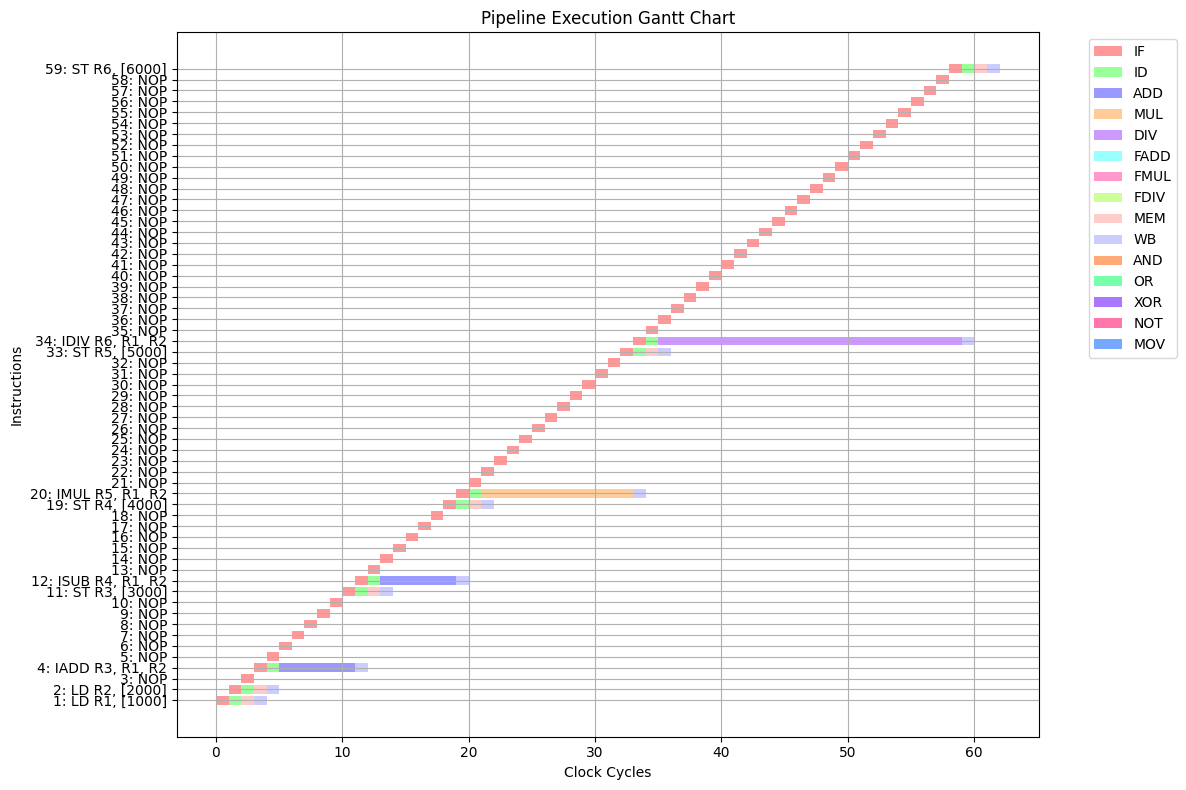

In [ ]:
import re

# Define pipeline stages and latencies
pipeline_stages = {
    # integer
    'IADD': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'ISUB': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'IMUL': {'IF': 1, 'ID': 1, 'MUL': 12, 'WB': 1},
    'IDIV': {'IF': 1, 'ID': 1, 'DIV': 24, 'WB': 1},

    # floating
    'FADD': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FSUB': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FMUL': {'IF': 1, 'ID': 1, 'FMUL': 30, 'WB': 1},
    'FDIV': {'IF': 1, 'ID': 1, 'FDIV': 60, 'WB': 1},

    # logical operations
    'AND': {'IF': 1, 'ID': 1, 'AND': 1, 'WB': 1},
    'OR': {'IF': 1, 'ID': 1, 'OR': 1, 'WB': 1},
    'XOR': {'IF': 1, 'ID': 1, 'XOR': 1, 'WB': 1},
    'NOT': {'IF': 1, 'ID': 1, 'NOT': 1, 'WB': 1},

    # load and store
    'LD': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},
    'ST': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},

    # NOP
    'NOP': {'IF': 1},

    # move
    'MOV': {'IF': 1, 'ID': 1, 'MOV': 1, 'WB': 1}
}

def get_functional_unit_and_latency(stages):
    functional_units = ['ADD', 'MUL', 'DIV', 'FADD', 'FMUL', 'FDIV', 'MEM', 'AND', 'OR', 'XOR', 'NOT']
    for stage, latency in stages.items():
        if stage in functional_units:
            return stage, latency
    return None, None  # No functional unit found

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_pipeline_gantt(instructions, total_cycles):
    # Define stage colors
    stage_colors = {
        'IF': '#FF9999',
        'ID': '#99FF99',
        'ADD': '#9999FF',
        'MUL': '#FFCC99',
        'DIV': '#CC99FF',
        'FADD': '#99FFFF',
        'FMUL': '#FF99CC',
        'FDIV': '#CCFF99',
        'MEM': '#FFCCCC',
        'WB': '#CCCCFF',
        'AND': '#FFAA77',
        'OR': '#77FFAA',
        'XOR': '#AA77FF',
        'NOT': '#FF77AA',
        'MOV': '#77AAFF'
    }

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set y-axis labels (instruction names)
    y_labels = []
    for i, instr in enumerate(instructions):
        if instr['op'] in ['LD', 'ST']:
            y_labels.append(f"{i+1}: {instr['op']} {instr['dest']}, [{instr['src1']}]")
        elif instr['op'] == 'NOP':
            y_labels.append(f"{i+1}: NOP")
        else:
            y_labels.append(f"{i+1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    # Initialize timeline for each instruction
    timeline = {}
    for i, instr in enumerate(instructions):
        timeline[i] = [''] * total_cycles
        current_cycle = i

        # Handle NOP instructions differently
        if instr['op'] == 'NOP':
            timeline[i][current_cycle] = 'IF'  # Only IF stage for NOP
            current_cycle += 1
        else:
            # Regular instructions: IF and ID first
            timeline[i][current_cycle] = 'IF'
            current_cycle += 1
            timeline[i][current_cycle] = 'ID'
            current_cycle += 1

        # Add wait cycles if any
        if 'wait_cycles' in instr:
            for cycle in range(current_cycle, current_cycle + instr['wait_cycles']):
                if cycle < total_cycles:
                    timeline[i][cycle] = '_'
            current_cycle += instr['wait_cycles']

        # Fill remaining stages (skip for NOP)
        if instr['op'] != 'NOP':
            for stage, latency in instr['stages'].items():
                if stage not in ['IF', 'ID']:  # Skip IF and ID since already handled
                    for cycle in range(current_cycle, current_cycle + latency):
                        if cycle < total_cycles:
                            timeline[i][cycle] = stage
                    current_cycle += latency

    # Plot each instruction's timeline
    for i, instr in enumerate(instructions):
        for cycle in range(total_cycles):
            stage = timeline[i][cycle]
            if stage:  # Only plot if there's a stage
                ax.broken_barh([(cycle, 1)], (i-0.4, 0.8),
                              facecolors=stage_colors.get(stage, '#FFFFFF'))

    # Customize the plot
    ax.set_yticks(range(len(instructions)))
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Clock Cycles')
    ax.set_ylabel('Instructions')
    ax.set_title('Pipeline Execution Gantt Chart')
    ax.grid(True)

    # Create legend
    legend_elements = [Patch(facecolor=color, label=stage)
                      for stage, color in stage_colors.items()]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

def display_clock_cycle_execution(updated_instructions, total_cycles):
    # Initialize a timeline for each instruction
    timeline = {}
    for i, instr in enumerate(updated_instructions):
        timeline[i] = [' '] * total_cycles  # Initialize with empty spaces for all clock cycles

    # Track the start cycle for each instruction
    for i, instr in enumerate(updated_instructions):
        stages = instr['stages']
        current_cycle = i  # Start at cycle i (0-based index)
        for stage, latency in stages.items():
            # Fill the timeline for the current stage
            for cycle in range(current_cycle, current_cycle + latency):
                if cycle < total_cycles:  # Ensure we don't exceed the total_cycles limit
                    timeline[i][cycle] = stage
            current_cycle += latency

    # Determine maximum stage name length for uniform spacing
    max_stage_length = max(len(stage) for instr in updated_instructions for stage in instr['stages'])
    max_cycle_length = len(str(total_cycles))  # Maximum length of clock cycle numbers

    # Define column width based on the maximum length
    column_width = max(max_stage_length, max_cycle_length) + 2  # Add padding

    # Determine the maximum instruction name length for dynamic spacing
    max_instr_length = max(
        len(f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
        if instr['op'] not in ['LD', 'ST', 'NOP']
        else len(f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]")
        if instr['op'] in ['LD', 'ST']
        else len(f"{i + 1}: NOP")
        for i, instr in enumerate(updated_instructions)
    )

    # Print the timeline
    print("Clock Cycle Execution:")
    print(" " * (max_instr_length + 2) + "|", end="")
    for cycle in range(1, total_cycles + 1):
        print(f" {cycle:^{column_width}} |", end="")  # Center-align clock cycles
    print()

    for i, instr in enumerate(updated_instructions):
        # Display the instruction name with index
        if instr['op'] in ['LD', 'ST']:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]"
        elif instr['op'] == 'NOP':
            instruction_name = f"{i + 1}: NOP"
        else:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}"

        # Print the instruction name and its stages
        print(f"{instruction_name: <{max_instr_length}} |", end="")
        for cycle in range(total_cycles):
            stage = timeline[i][cycle]
            print(f" {stage:^{column_width}} |", end="")  # Center-align stages
        print()

def display_functional_units(updated_instructions, total_cycles):
    # Define the functional units
    functional_units = ['ADD', 'MUL', 'DIV', 'FADD', 'FMUL', 'FDIV', 'AND', 'OR', 'XOR', 'NOT', 'MEM']

    # Initialize a timeline for each functional unit
    timeline = {unit: [' '] * len(updated_instructions) for unit in functional_units}

    # Track the start cycle for each instruction
    for i, instr in enumerate(updated_instructions):
        stages = instr['stages']
        functional_unit, _ = get_functional_unit_and_latency(stages)
        # print("functional_unit : ", functional_unit)

        # Format the full instruction string
        if instr['op'] in ['LD', 'ST']:
            instruction_str = f"{instr['op']} {instr['dest']}, [{instr['src1']}]"
        elif instr['op'] == 'NOP':
            instruction_str = "NOP"
        else:
            instruction_str = f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}"

        if functional_unit:
            # Place the instruction only in its corresponding functional unit
            timeline[functional_unit][i] = instruction_str
        else:
            # Handle NOP instructions (display in all functional units)
            for unit in functional_units:
                timeline[unit][i] = instruction_str

    # Determine the maximum instruction length for each functional unit
    max_instr_lengths = {unit: 0 for unit in functional_units}
    for unit in functional_units:
        for i in range(len(updated_instructions)):
            instruction = timeline[unit][i]
            if len(instruction) > max_instr_lengths[unit]:
                max_instr_lengths[unit] = len(instruction)

    # Adjust spacing based on the number of letters in the unit name
    for unit in functional_units:
        if len(unit) == 3:  # 3-letter units (DIV, AND, XOR, NOT, etc.)
            max_instr_lengths[unit] = max(max_instr_lengths[unit], 10)  # More spacing
        elif len(unit) == 4:  # 4-letter units (FADD, FMUL, FDIV, etc.)
            max_instr_lengths[unit] = max(max_instr_lengths[unit], 8)  # Less spacing
        else:  # Other units (e.g., MEM)
            max_instr_lengths[unit] = max(max_instr_lengths[unit], len(unit))

    # Print the functional units horizontally at the top
    print("Functional Units Execution:")
    print(" " * len(str(len(updated_instructions))) + " |", end="")
    for unit in functional_units:
        print(f" {unit:^{max_instr_lengths[unit]}} |", end="")
    print()

    # Print the instruction number and the timeline
    for i in range(len(updated_instructions)):
        print(f"{i + 1:>{len(str(len(updated_instructions)))}} |", end="")
        for unit in functional_units:
            stage = timeline[unit][i]
            print(f" {stage:^{max_instr_lengths[unit]}} |", end="")
        print()

# Function to insert NOPs for structural hazards
def insert_nops_for_structural_hazards(instructions):
    updated_instructions = []
    total_cycles = 0
    prev_accum_latency = 0
    curr_latency = 0

    for i, instruction in enumerate(instructions):
        if i > 0:
            curr_instr = instructions[i]
            curr_func_unit, curr_func_latency = get_functional_unit_and_latency(curr_instr['stages'])

            # Iterate backward from i-1 to 0 to find the first conflicting instruction
            conflict_found = False
            for j in range(i - 1, -1, -1):
                prev_instr = instructions[j]
                prev_func_unit, prev_func_latency = get_functional_unit_and_latency(prev_instr['stages'])

                # Check for structural hazard (same functional unit)
                if prev_func_unit is not None and curr_func_unit == prev_func_unit:
                    conflict_found = True
                    # Update curr_latency based on the conflicting instruction's latency
                    if prev_func_latency is not None:
                        curr_latency = prev_func_latency - (i - j)
                    break  # Stop after finding the first conflict

            # If no conflict is found, reset curr_latency
            if not conflict_found or curr_latency < 0:
                curr_latency = 0

            # print("curr_func_unit, curr_func_latency", curr_func_unit, curr_func_latency)
            # print("prev_func_unit, prev_func_latency", prev_func_unit, prev_func_latency)
            # print("curr_latency : ", curr_latency)
            prev_accum_latency += curr_latency
            # print("prev_accum_latency : ", prev_accum_latency)

            # Insert NOPs for the accumulated latency
            for _ in range(curr_latency):
                updated_instructions.append({'op': 'NOP', 'stages': pipeline_stages['NOP']})

        # Add the current instruction
        updated_instructions.append(instruction)

        # Update total_cycles
        time = sum(instruction['stages'].values())
        total_cycles = max(i + time + prev_accum_latency, total_cycles)

    return updated_instructions, total_cycles

# Function to insert NOPs for raw and waw dependencies
# The while loop dynamically adjusts to the changing size of updated_instructions.
# After inserting NOPs, the loop will not skip over the inserted NOPs and will continue to process all instructions (including the last one).
def handle_data_dependencies(updated_instructions, total_cycles):
    i = 1  # Start from the second instruction
    while i < len(updated_instructions):  # Use a while loop to adjust dynamically
        curr_instr = updated_instructions[i]
        print(f"{i} :  {curr_instr}")

        print("len(updated_instructions) : ", len(updated_instructions))

        # Collect valid source registers (src1 and src2, if they exist)
        curr_registers = []
        if 'src1' in curr_instr and curr_instr['src1'] is not None:
            curr_registers.append(curr_instr['src1'])
        if 'src2' in curr_instr and curr_instr['src2'] is not None:
            curr_registers.append(curr_instr['src2'])
        if 'dest' in curr_instr and curr_instr['dest'] is not None:   # for waw
            curr_registers.append(curr_instr['dest'])

        max_time = 0
        max_time_index = -1

        # Iterate backward from i-1 to 0
        for j in range(i - 1, -1, -1):
            prev_instr = updated_instructions[j]

            # Check if the previous instruction has a destination register
            if 'dest' in prev_instr and prev_instr['dest'] is not None and prev_instr['op'] != 'ST':
                prev_dest_register = prev_instr['dest']  # Destination register of the previous instruction

                # Check if any source register of the current instruction matches the destination register of the previous instruction
                if prev_dest_register in curr_registers:
                    # Calculate the completion time of the previous instruction
                    prev_completion_time = j + sum(prev_instr['stages'].values())
                    if prev_completion_time > max_time:
                        max_time = prev_completion_time
                        max_time_index = j
                        break

        # If a dependency is found, calculate the number of NOPs needed
        if max_time_index != -1:
            # Calculate the number of NOPs
            nops_needed = (max_time_index + sum(updated_instructions[max_time_index]['stages'].values())) - (i + 2)  # 2 for IF and ID
            if nops_needed > 0:
                # Insert NOPs
                for _ in range(nops_needed):
                    updated_instructions.insert(i, {'op': 'NOP', 'stages': pipeline_stages['NOP']})

                # # Update total_cycles
                # total_cycles += nops_needed

                # After inserting NOPs, we do not increment i, as the newly inserted NOP will be processed next
                i += nops_needed
                continue  # Skip the normal increment and process the inserted NOP

        total_cycles = max(i + sum(updated_instructions[i]['stages'].values()), total_cycles)

        # Increment index to move to the next instruction
        i += 1

    return updated_instructions, total_cycles

# Function to parse assembly code
import re

def parse_assembly(assembly):
    instructions = []
    valid_ops = ['IADD', 'ISUB', 'IMUL', 'IDIV', 'FADD', 'FSUB', 'FMUL', 'FDIV', 'AND', 'OR', 'XOR', 'NOT', 'LD', 'ST', 'MOV', 'NOP']

    for line in assembly:
        line = line.strip()

        # Skip empty lines
        if not line:
            continue

        # Regex for arithmetic/logic instructions (e.g., IADD R1, R2, R3)
        match_arithmetic = re.match(r'^(IADD|ISUB|IMUL|IDIV|FADD|FSUB|FMUL|FDIV|AND|OR|XOR|NOT)\s+(R\d+),\s*(R\d+),\s*(R\d+)$', line)

        # Regex for MOV instructions (e.g., MOV R8, R7 or MOV R8, 1000)
        match_mov = re.match(r'^(MOV)\s+(R\d+),\s*(R\d+|\d+)$', line)

        # Regex for memory instructions with register or immediate address (e.g., LD R8, [R9] or LD R8, [1000])
        match_memory = re.match(r'^(LD|ST)\s+(R\d+),\s*\[(R\d+|\d+)\]$', line)

        # Regex for NOP instruction
        match_nop = re.match(r'^NOP$', line)

        # Check if the operation is valid
        op = line.split()[0] if line else None
        if op not in valid_ops:
            print(f"Error: Unknown instruction `{op}`.")
            return []

        if match_arithmetic:
            op = match_arithmetic.group(1)
            dest = match_arithmetic.group(2)
            src1 = match_arithmetic.group(3)
            src2 = match_arithmetic.group(4)

            # Check if registers are valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []
            if not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []
            if not (0 <= int(src2[1:]) <= 31):
                print(f"Error: Invalid register name `{src2}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': src2, 'stages': pipeline_stages[op]})

        elif match_mov:
            op = match_mov.group(1)
            dest = match_mov.group(2)
            src1 = match_mov.group(3)

            # Check if destination register is valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []

            # Check if source is a register and valid (R0 to R31)
            if src1.startswith('R') and not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_memory:
            op = match_memory.group(1)
            dest = match_memory.group(2)
            src1 = match_memory.group(3)

            # Check if destination register is valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []

            # Check if source is a register and valid (R0 to R31)
            if src1.startswith('R') and not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_nop:
            instructions.append({'op': 'NOP', 'dest': None, 'src1': None, 'src2': None, 'stages': pipeline_stages['NOP']})

        else:
            # If the line doesn't match any regex, it's an unknown instruction
            print(f"Error: Unknown instruction `{line.split()[0]}`.")
            return []

    return instructions

# Main function
def main():
    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FMUL R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "FDIV R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R7, [1000]",
    #     "IADD R1, R2, R3",
    #     "FMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R1, R2"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R4, R2"
    # ]

    # assembly_code = [
    #     "IDIV R3, R1, R3",
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R4, R3"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IDIV R3, R1, R3",
    #     "ISUB R1, R4, R3"
    # ]

    # assembly_code = [
    #     "IDIV R3, R1, R3",
    #     "IMUL R1, R2, R4",
    #     "ISUB R6, R4, R5"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6",
    #     "ST R4, [3000]",
    #     "ST R4, [4000]"
    # ]

    # assembly_code = [
    #     "LD R0, [1000]",
    #     "LD R1, [2000]",
    #     "IADD R1, R1, R0",
    #     "IMUL R1, R0, R0"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6",
    #     "ST R4, [3000]",
    #     "ST R4, [4000]",
    #     "IADD R4, R5, R7",
    #     "ST R4, [5000]"
    # ]

    # assembly_code = [
    #     "LD R1, [100]",
    #     "LD R2, [150]",
    #     "IADD R3, R2, R1",
    #     "IMUL R4, R2, R1",
    #     "IADD R5, R3, R4",
    #     "ST R3, [200]",
    #     "ST R4, [250]",
    #     "ST R5, [300]"
    # ]

    # assembly_code = [
    #     "LD R1, [100]",
    #     "LD R2, [150]",
    #     "IADD R3, R2, R1
    # ]

    # assembly_code = [
    #     "LD R0, [1000]",
    #     "LD R1, [2000]",
    #     "IADD R1, R1, R0",
    #     "IMUL R1, R0, R0",
    #     "IADD R1, R0, R0"
    # ]

    assembly_code = [
        "LD R1, [1000]",
        "LD R2, [2000]",
        "IADD R3, R1, R2",
        "ISUB R4, R1, R2",
        "IADD R4, R4, R2",
        "IMUL R5, R1, R2",
        "IDIV R6, R1, R2",
        "ST R3, [3000]",
        "ST R4, [4000]",
        "ST R5, [5000]",
        "ST R6, [6000]"
    ]

    # assembly_code = [
    #     "LD R1, [1000]",
    #     "LD R2, [1001]",
    #     "IADD R3, R2, R1",
    #     "IMUL R4, R2, R1",
    #     "IADD R5, R3, R4",
    #     "ST R3, [1002]",
    #     "ST R4, [1003]",
    #     "ST R5, [1004]",
    #     "LD R6, [1005]",
    #     "LD R7, [1006]",
    #     "FADD R8, R6, R7",
    #     "FMUL R9, R8, R6",
    #     "FADD R10, R8, R9",
    #     "FMUL R11, R8, R10",
    #     "FMUL R8, R11, R10",
    #     "AND R9, R8, R11",
    #     "OR R12, R8, R11",
    #     "ST R8, [1007]",
    #     "ST R9, [1008]",
    #     "ST R10, [1009]",
    #     "ST R11, [1010]",
    #     "ST R12, [1011]"
    # ]

    assembly_code = [
        "LD R1, [1000]",
        "LD R2, [2000]",
        "IADD R3, R1, R2",
        "ST R3, [3000]",
        "ISUB R4, R1, R2",
        "ST R4, [4000]",
        "IMUL R5, R1, R2",
        "ST R5, [5000]",
        "IDIV R6, R1, R2",
        "ST R6, [6000]"
    ]

    # # calculator program
    # assembly_code = [
    #     "LD R1, [1000]",
    #     "LD R2, [2000]",
    #     "IADD R3, R1, R2",
    #     "ISUB R4, R1, R2",
    #     "IMUL R5, R1, R2",
    #     "IDIV R6, R1, R2",
    #     "ST R3, [3000]",
    #     "ST R4, [4000]",
    #     "ST R5, [5000]",
    #     "ST R6, [6000]"
    # ]

    instructions = parse_assembly(assembly_code)

    if not instructions:
        return

    # Print the parsed
    total_cycles = 0
    updated_instructions, total_cycles = handle_data_dependencies(instructions, total_cycles)
    # updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)

    print("updated_instructions")
    for i, instruction in enumerate(updated_instructions):
      print(f"{i} : {instruction}")

    print("data dependency")

    # updated_instructions, total_cycles = handle_data_dependencies(updated_instructions, total_cycles)
    updated_instructions, total_cycles = insert_nops_for_structural_hazards(updated_instructions)

    print("Updated Code with NOPs:")
    for instr in updated_instructions:
        if instr['op'] == 'NOP':
            print("NOP")
        else:
            if instr['op'] in ['LD', 'ST']:
                print(f"{instr['op']} {instr['dest']}, [{instr['src1']}]")
            else:
                print(f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    print(f"\nTotal clock cycles: {total_cycles}")


    # for i, instr in enumerate(updated_instructions):
    #     if instr['op'] in ['LD', 'ST']:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, [{instr['src1']}]")
    #     elif instr['op'] == 'NOP':
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']}")
    #     else:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
    print(" ")
    print(" ")
    display_functional_units(updated_instructions, total_cycles)
    print(" ")
    print(" ")
    display_clock_cycle_execution(updated_instructions, total_cycles)
    print(" ")
    print(" ")
    plot_pipeline_gantt(updated_instructions, total_cycles)

if __name__ == "__main__":
    main()


Instructions Grouped by Dependency Level:

Level 0:
  LD R1, [1000]
  LD R2, [1001]
  LD R6, [1005]
  LD R7, [1006]

Level 1:
  IADD R3, R2, R1
  IMUL R4, R2, R1
  FADD R8, R6, R7

Level 2:
  IADD R5, R3, R4
  ST R3, [1002]
  ST R4, [1003]
  FMUL R9, R8, R6
  ST R8, [1007]

Level 3:
  ST R5, [1004]
  FADD R10, R8, R9
  ST R9, [1008]

Level 4:
  FMUL R11, R8, R10
  ST R10, [1009]

Level 5:
  FMUL R8, R11, R10
  ST R11, [1010]

Level 6:
  AND R9, R8, R11
  OR R12, R8, R11

Level 7:
  ST R12, [1011]
1 :  {'op': 'LD', 'dest': 'R2', 'src1': '1001', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) :  22
2 :  {'op': 'LD', 'dest': 'R6', 'src1': '1005', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) :  22
3 :  {'op': 'LD', 'dest': 'R7', 'src1': '1006', 'src2': None, 'stages': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1}}
len(updated_instructions) :  22
4 :  {'op': 'IADD', 'dest': 'R3', 'src1': 'R2', 'src2': 'R1', 'stage

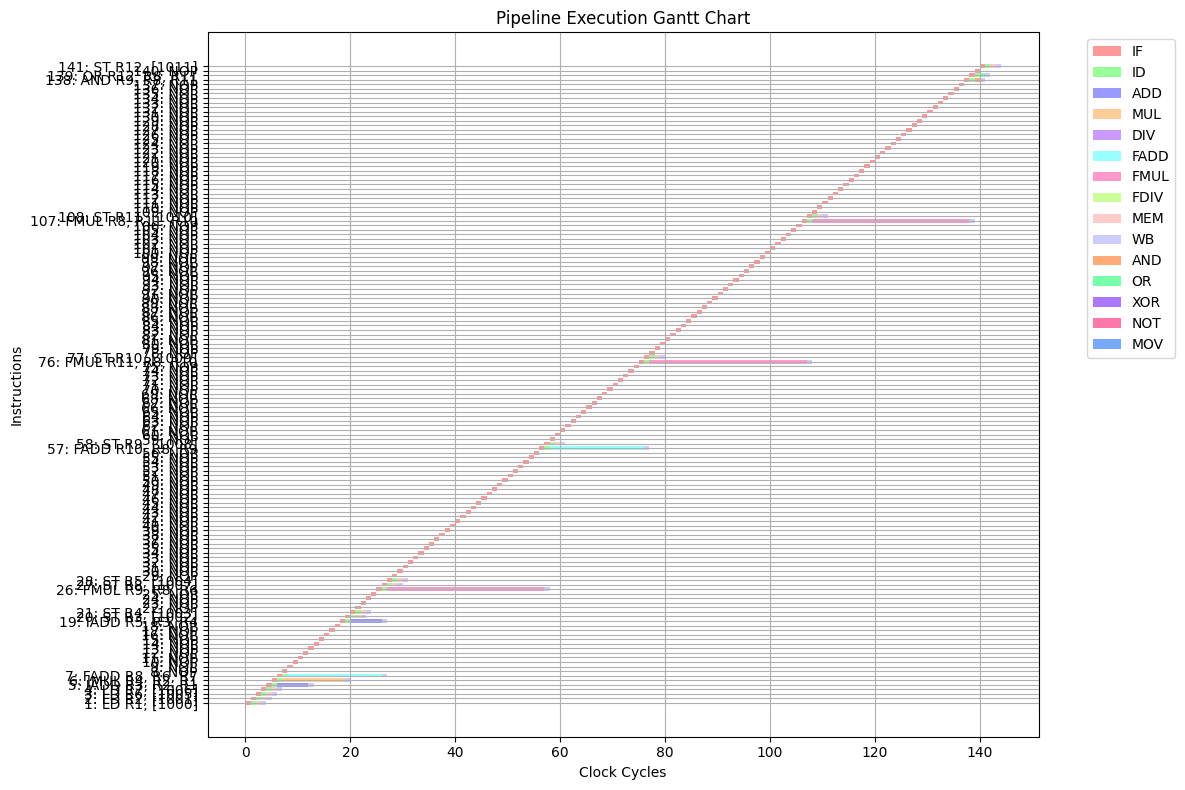

In [ ]:
import re

# Define pipeline stages and latencies
pipeline_stages = {
    # integer
    'IADD': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'ISUB': {'IF': 1, 'ID': 1, 'ADD': 6, 'WB': 1},
    'IMUL': {'IF': 1, 'ID': 1, 'MUL': 12, 'WB': 1},
    'IDIV': {'IF': 1, 'ID': 1, 'DIV': 24, 'WB': 1},

    # floating
    'FADD': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FSUB': {'IF': 1, 'ID': 1, 'FADD': 18, 'WB': 1},
    'FMUL': {'IF': 1, 'ID': 1, 'FMUL': 30, 'WB': 1},
    'FDIV': {'IF': 1, 'ID': 1, 'FDIV': 60, 'WB': 1},

    # logical operations
    'AND': {'IF': 1, 'ID': 1, 'AND': 1, 'WB': 1},
    'OR': {'IF': 1, 'ID': 1, 'OR': 1, 'WB': 1},
    'XOR': {'IF': 1, 'ID': 1, 'XOR': 1, 'WB': 1},
    'NOT': {'IF': 1, 'ID': 1, 'NOT': 1, 'WB': 1},

    # load and store
    'LD': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},
    'ST': {'IF': 1, 'ID': 1, 'MEM': 1, 'WB': 1},

    # NOP
    'NOP': {'IF': 1},

    # move
    'MOV': {'IF': 1, 'ID': 1, 'MOV': 1, 'WB': 1}
}

def get_functional_unit_and_latency(stages):
    functional_units = ['ADD', 'MUL', 'DIV', 'FADD', 'FMUL', 'FDIV', 'MEM', 'AND', 'OR', 'XOR', 'NOT']
    for stage, latency in stages.items():
        if stage in functional_units:
            return stage, latency
    return None, None  # No functional unit found

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_pipeline_gantt(instructions, total_cycles):
    # Define stage colors
    stage_colors = {
        'IF': '#FF9999',
        'ID': '#99FF99',
        'ADD': '#9999FF',
        'MUL': '#FFCC99',
        'DIV': '#CC99FF',
        'FADD': '#99FFFF',
        'FMUL': '#FF99CC',
        'FDIV': '#CCFF99',
        'MEM': '#FFCCCC',
        'WB': '#CCCCFF',
        'AND': '#FFAA77',
        'OR': '#77FFAA',
        'XOR': '#AA77FF',
        'NOT': '#FF77AA',
        'MOV': '#77AAFF'
    }

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set y-axis labels (instruction names)
    y_labels = []
    for i, instr in enumerate(instructions):
        if instr['op'] in ['LD', 'ST']:
            y_labels.append(f"{i+1}: {instr['op']} {instr['dest']}, [{instr['src1']}]")
        elif instr['op'] == 'NOP':
            y_labels.append(f"{i+1}: NOP")
        else:
            y_labels.append(f"{i+1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    # Initialize timeline for each instruction
    timeline = {}
    for i, instr in enumerate(instructions):
        timeline[i] = [''] * total_cycles
        current_cycle = i

        # Handle NOP instructions differently
        if instr['op'] == 'NOP':
            timeline[i][current_cycle] = 'IF'  # Only IF stage for NOP
            current_cycle += 1
        else:
            # Regular instructions: IF and ID first
            timeline[i][current_cycle] = 'IF'
            current_cycle += 1
            timeline[i][current_cycle] = 'ID'
            current_cycle += 1

        # Add wait cycles if any
        if 'wait_cycles' in instr:
            for cycle in range(current_cycle, current_cycle + instr['wait_cycles']):
                if cycle < total_cycles:
                    timeline[i][cycle] = '_'
            current_cycle += instr['wait_cycles']

        # Fill remaining stages (skip for NOP)
        if instr['op'] != 'NOP':
            for stage, latency in instr['stages'].items():
                if stage not in ['IF', 'ID']:  # Skip IF and ID since already handled
                    for cycle in range(current_cycle, current_cycle + latency):
                        if cycle < total_cycles:
                            timeline[i][cycle] = stage
                    current_cycle += latency

    # Plot each instruction's timeline
    for i, instr in enumerate(instructions):
        for cycle in range(total_cycles):
            stage = timeline[i][cycle]
            if stage:  # Only plot if there's a stage
                ax.broken_barh([(cycle, 1)], (i-0.4, 0.8),
                              facecolors=stage_colors.get(stage, '#FFFFFF'))

    # Customize the plot
    ax.set_yticks(range(len(instructions)))
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Clock Cycles')
    ax.set_ylabel('Instructions')
    ax.set_title('Pipeline Execution Gantt Chart')
    ax.grid(True)

    # Create legend
    legend_elements = [Patch(facecolor=color, label=stage)
                      for stage, color in stage_colors.items()]
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

def display_clock_cycle_execution(updated_instructions, total_cycles):
    # Initialize a timeline for each instruction
    timeline = {}
    for i, instr in enumerate(updated_instructions):
        timeline[i] = [' '] * total_cycles  # Initialize with empty spaces for all clock cycles

    # Track the start cycle for each instruction
    for i, instr in enumerate(updated_instructions):
        stages = instr['stages']
        current_cycle = i  # Start at cycle i (0-based index)
        for stage, latency in stages.items():
            # Fill the timeline for the current stage
            for cycle in range(current_cycle, current_cycle + latency):
                if cycle < total_cycles:  # Ensure we don't exceed the total_cycles limit
                    timeline[i][cycle] = stage
            current_cycle += latency

    # Determine maximum stage name length for uniform spacing
    max_stage_length = max(len(stage) for instr in updated_instructions for stage in instr['stages'])
    max_cycle_length = len(str(total_cycles))  # Maximum length of clock cycle numbers

    # Define column width based on the maximum length
    column_width = max(max_stage_length, max_cycle_length) + 2  # Add padding

    # Determine the maximum instruction name length for dynamic spacing
    max_instr_length = max(
        len(f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
        if instr['op'] not in ['LD', 'ST', 'NOP']
        else len(f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]")
        if instr['op'] in ['LD', 'ST']
        else len(f"{i + 1}: NOP")
        for i, instr in enumerate(updated_instructions)
    )

    # Print the timeline
    print("Clock Cycle Execution:")
    print(" " * (max_instr_length + 2) + "|", end="")
    for cycle in range(1, total_cycles + 1):
        print(f" {cycle:^{column_width}} |", end="")  # Center-align clock cycles
    print()

    for i, instr in enumerate(updated_instructions):
        # Display the instruction name with index
        if instr['op'] in ['LD', 'ST']:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, [{instr['src1']}]"
        elif instr['op'] == 'NOP':
            instruction_name = f"{i + 1}: NOP"
        else:
            instruction_name = f"{i + 1}: {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}"

        # Print the instruction name and its stages
        print(f"{instruction_name: <{max_instr_length}} |", end="")
        for cycle in range(total_cycles):
            stage = timeline[i][cycle]
            print(f" {stage:^{column_width}} |", end="")  # Center-align stages
        print()

def display_functional_units(updated_instructions, total_cycles):
    # Define the functional units
    functional_units = ['ADD', 'MUL', 'DIV', 'FADD', 'FMUL', 'FDIV', 'AND', 'OR', 'XOR', 'NOT', 'MEM']

    # Initialize a timeline for each functional unit
    timeline = {unit: [' '] * len(updated_instructions) for unit in functional_units}

    # Track the start cycle for each instruction
    for i, instr in enumerate(updated_instructions):
        stages = instr['stages']
        functional_unit, _ = get_functional_unit_and_latency(stages)
        # print("functional_unit : ", functional_unit)

        # Format the full instruction string
        if instr['op'] in ['LD', 'ST']:
            instruction_str = f"{instr['op']} {instr['dest']}, [{instr['src1']}]"
        elif instr['op'] == 'NOP':
            instruction_str = "NOP"
        else:
            instruction_str = f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}"

        if functional_unit:
            # Place the instruction only in its corresponding functional unit
            timeline[functional_unit][i] = instruction_str
        else:
            # Handle NOP instructions (display in all functional units)
            for unit in functional_units:
                timeline[unit][i] = instruction_str

    # Determine the maximum instruction length for each functional unit
    max_instr_lengths = {unit: 0 for unit in functional_units}
    for unit in functional_units:
        for i in range(len(updated_instructions)):
            instruction = timeline[unit][i]
            if len(instruction) > max_instr_lengths[unit]:
                max_instr_lengths[unit] = len(instruction)

    # Adjust spacing based on the number of letters in the unit name
    for unit in functional_units:
        if len(unit) == 3:  # 3-letter units (DIV, AND, XOR, NOT, etc.)
            max_instr_lengths[unit] = max(max_instr_lengths[unit], 10)  # More spacing
        elif len(unit) == 4:  # 4-letter units (FADD, FMUL, FDIV, etc.)
            max_instr_lengths[unit] = max(max_instr_lengths[unit], 8)  # Less spacing
        else:  # Other units (e.g., MEM)
            max_instr_lengths[unit] = max(max_instr_lengths[unit], len(unit))

    # Print the functional units horizontally at the top
    print("Functional Units Execution:")
    print(" " * len(str(len(updated_instructions))) + " |", end="")
    for unit in functional_units:
        print(f" {unit:^{max_instr_lengths[unit]}} |", end="")
    print()

    # Print the instruction number and the timeline
    for i in range(len(updated_instructions)):
        print(f"{i + 1:>{len(str(len(updated_instructions)))}} |", end="")
        for unit in functional_units:
            stage = timeline[unit][i]
            print(f" {stage:^{max_instr_lengths[unit]}} |", end="")
        print()

def topological_sort_instructions(instructions):
    # Build dependency graph and calculate in-degree
    graph = {i: set() for i in range(len(instructions))}
    in_degree = {i: 0 for i in range(len(instructions))}
    last_write = {}  # Tracks last write to each register

    # First pass: build the dependency graph
    for i, instr in enumerate(instructions):
        # Get registers read by this instruction
        reads = set()
        if 'src1' in instr and instr['src1'] is not None:
            reads.add(instr['src1'])
        if 'src2' in instr and instr['src2'] is not None:
            reads.add(instr['src2'])
        if instr['op'] == 'ST' and 'dest' in instr and instr['dest'] is not None:
            reads.add(instr['dest'])  # For ST, dest is memory address (source)

        # Get registers written by this instruction
        writes = set()
        if instr['op'] != 'ST' and 'dest' in instr and instr['dest'] is not None:
            writes.add(instr['dest'])

        # Add RAW dependencies
        for reg in reads:
            if reg in last_write:
                j = last_write[reg]
                if j != i and i not in graph[j]:
                    graph[j].add(i)
                    in_degree[i] += 1

        # Add WAW dependencies
        for reg in writes:
            if reg in last_write:
                j = last_write[reg]
                if j != i and i not in graph[j]:
                    graph[j].add(i)
                    in_degree[i] += 1

        # Update last_write for written registers
        for reg in writes:
            last_write[reg] = i

    # Calculate dependency levels using BFS
    levels = {}
    queue = []

    # Initialize queue with instructions having in_degree 0
    for i in range(len(instructions)):
        if in_degree[i] == 0:
            levels[i] = 0
            queue.append(i)

    # Process instructions in BFS order to assign levels
    while queue:
        u = queue.pop(0)
        for v in graph[u]:
            # The level is at least one more than its predecessor
            if v not in levels or levels[v] < levels[u] + 1:
                levels[v] = levels[u] + 1
            queue.append(v)

    # For ST instructions, ensure they're one level after their data producer
    for i, instr in enumerate(instructions):
        if instr['op'] == 'ST' and 'dest' in instr and instr['dest'] is not None:
            # Find the instruction that produced the stored value
            for j in range(len(instructions)):
                if (instructions[j]['op'] != 'ST' and
                    'dest' in instructions[j] and
                    instructions[j]['dest'] == instr['dest']):
                    levels[i] = levels[j] + 1
                    break

    # Group instructions by level
    level_groups = {}
    for i, level in levels.items():
        if level not in level_groups:
            level_groups[level] = []
        level_groups[level].append(i)

    # Sort levels and maintain original order within each level
    sorted_levels = sorted(level_groups.keys())
    topo_order = []
    for level in sorted_levels:
        level_groups[level].sort()  # Maintain original order within level
        topo_order.extend(level_groups[level])

    # Reorder instructions
    reordered = [instructions[i] for i in topo_order]

    # Display the reordered instructions with levels
    print("\nInstructions Grouped by Dependency Level:")
    for level in sorted_levels:
        print(f"\nLevel {level}:")
        for i in level_groups[level]:
            instr = instructions[i]
            if instr['op'] == 'NOP':
                print(f"  NOP")
            elif instr['op'] in ['LD', 'ST']:
                print(f"  {instr['op']} {instr['dest']}, [{instr['src1']}]")
            else:
                src2 = instr['src2'] if instr['src2'] is not None else ""
                print(f"  {instr['op']} {instr['dest']}, {instr['src1']}, {src2}")

    return reordered

# Function to insert NOPs for structural hazards
def insert_nops_for_structural_hazards(instructions):
    updated_instructions = []
    total_cycles = 0
    prev_accum_latency = 0
    curr_latency = 0

    for i, instruction in enumerate(instructions):
        if i > 0:
            curr_instr = instructions[i]
            curr_func_unit, curr_func_latency = get_functional_unit_and_latency(curr_instr['stages'])

            # Iterate backward from i-1 to 0 to find the first conflicting instruction
            conflict_found = False
            for j in range(i - 1, -1, -1):
                prev_instr = instructions[j]
                prev_func_unit, prev_func_latency = get_functional_unit_and_latency(prev_instr['stages'])

                # Check for structural hazard (same functional unit)
                if prev_func_unit is not None and curr_func_unit == prev_func_unit:
                    conflict_found = True
                    # Update curr_latency based on the conflicting instruction's latency
                    if prev_func_latency is not None:
                        curr_latency = prev_func_latency - (i - j)
                    break  # Stop after finding the first conflict

            # If no conflict is found, reset curr_latency
            if not conflict_found or curr_latency < 0:
                curr_latency = 0

            # print("curr_func_unit, curr_func_latency", curr_func_unit, curr_func_latency)
            # print("prev_func_unit, prev_func_latency", prev_func_unit, prev_func_latency)
            # print("curr_latency : ", curr_latency)
            prev_accum_latency += curr_latency
            # print("prev_accum_latency : ", prev_accum_latency)

            # Insert NOPs for the accumulated latency
            for _ in range(curr_latency):
                updated_instructions.append({'op': 'NOP', 'stages': pipeline_stages['NOP']})

        # Add the current instruction
        updated_instructions.append(instruction)

        # Update total_cycles
        time = sum(instruction['stages'].values())
        total_cycles = max(i + time + prev_accum_latency, total_cycles)

    return updated_instructions, total_cycles

# Function to insert NOPs for raw and waw dependencies
# The while loop dynamically adjusts to the changing size of updated_instructions.
# After inserting NOPs, the loop will not skip over the inserted NOPs and will continue to process all instructions (including the last one).
def handle_data_dependencies(updated_instructions, total_cycles):
    i = 1  # Start from the second instruction
    while i < len(updated_instructions):  # Use a while loop to adjust dynamically
        curr_instr = updated_instructions[i]
        print(f"{i} :  {curr_instr}")

        print("len(updated_instructions) : ", len(updated_instructions))

        # Collect valid source registers (src1 and src2, if they exist)
        curr_registers = []
        if 'src1' in curr_instr and curr_instr['src1'] is not None:
            curr_registers.append(curr_instr['src1'])
        if 'src2' in curr_instr and curr_instr['src2'] is not None:
            curr_registers.append(curr_instr['src2'])
        if 'dest' in curr_instr and curr_instr['dest'] is not None:   # for waw
            curr_registers.append(curr_instr['dest'])

        max_time = 0
        max_time_index = -1

        # Iterate backward from i-1 to 0
        for j in range(i - 1, -1, -1):
            prev_instr = updated_instructions[j]

            # Check if the previous instruction has a destination register
            if 'dest' in prev_instr and prev_instr['dest'] is not None and prev_instr['op'] != 'ST':
                prev_dest_register = prev_instr['dest']  # Destination register of the previous instruction

                # Check if any source register of the current instruction matches the destination register of the previous instruction
                if prev_dest_register in curr_registers:
                    # Calculate the completion time of the previous instruction
                    prev_completion_time = j + sum(prev_instr['stages'].values())
                    if prev_completion_time > max_time:
                        max_time = prev_completion_time
                        max_time_index = j
                        break

        # If a dependency is found, calculate the number of NOPs needed
        if max_time_index != -1:
            # Calculate the number of NOPs
            nops_needed = (max_time_index + sum(updated_instructions[max_time_index]['stages'].values())) - (i + 2)  # 2 for IF and ID
            if nops_needed > 0:
                # Insert NOPs
                for _ in range(nops_needed):
                    updated_instructions.insert(i, {'op': 'NOP', 'stages': pipeline_stages['NOP']})

                # # Update total_cycles
                # total_cycles += nops_needed

                # After inserting NOPs, we do not increment i, as the newly inserted NOP will be processed next
                i += nops_needed
                continue  # Skip the normal increment and process the inserted NOP

        total_cycles = max(i + sum(updated_instructions[i]['stages'].values()), total_cycles)

        # Increment index to move to the next instruction
        i += 1

    return updated_instructions, total_cycles

# Function to parse assembly code
import re

def parse_assembly(assembly):
    instructions = []
    valid_ops = ['IADD', 'ISUB', 'IMUL', 'IDIV', 'FADD', 'FSUB', 'FMUL', 'FDIV', 'AND', 'OR', 'XOR', 'NOT', 'LD', 'ST', 'MOV', 'NOP']

    for line in assembly:
        line = line.strip()

        # Skip empty lines
        if not line:
            continue

        # Regex for arithmetic/logic instructions (e.g., IADD R1, R2, R3)
        match_arithmetic = re.match(r'^(IADD|ISUB|IMUL|IDIV|FADD|FSUB|FMUL|FDIV|AND|OR|XOR|NOT)\s+(R\d+),\s*(R\d+),\s*(R\d+)$', line)

        # Regex for MOV instructions (e.g., MOV R8, R7 or MOV R8, 1000)
        match_mov = re.match(r'^(MOV)\s+(R\d+),\s*(R\d+|\d+)$', line)

        # Regex for memory instructions with register or immediate address (e.g., LD R8, [R9] or LD R8, [1000])
        match_memory = re.match(r'^(LD|ST)\s+(R\d+),\s*\[(R\d+|\d+)\]$', line)

        # Regex for NOP instruction
        match_nop = re.match(r'^NOP$', line)

        # Check if the operation is valid
        op = line.split()[0] if line else None
        if op not in valid_ops:
            print(f"Error: Unknown instruction `{op}`.")
            return []

        if match_arithmetic:
            op = match_arithmetic.group(1)
            dest = match_arithmetic.group(2)
            src1 = match_arithmetic.group(3)
            src2 = match_arithmetic.group(4)

            # Check if registers are valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []
            if not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []
            if not (0 <= int(src2[1:]) <= 31):
                print(f"Error: Invalid register name `{src2}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': src2, 'stages': pipeline_stages[op]})

        elif match_mov:
            op = match_mov.group(1)
            dest = match_mov.group(2)
            src1 = match_mov.group(3)

            # Check if destination register is valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []

            # Check if source is a register and valid (R0 to R31)
            if src1.startswith('R') and not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_memory:
            op = match_memory.group(1)
            dest = match_memory.group(2)
            src1 = match_memory.group(3)

            # Check if destination register is valid (R0 to R31)
            if not (0 <= int(dest[1:]) <= 31):
                print(f"Error: Invalid register name `{dest}`.")
                return []

            # Check if source is a register and valid (R0 to R31)
            if src1.startswith('R') and not (0 <= int(src1[1:]) <= 31):
                print(f"Error: Invalid register name `{src1}`.")
                return []

            instructions.append({'op': op, 'dest': dest, 'src1': src1, 'src2': None, 'stages': pipeline_stages[op]})

        elif match_nop:
            instructions.append({'op': 'NOP', 'dest': None, 'src1': None, 'src2': None, 'stages': pipeline_stages['NOP']})

        else:
            # If the line doesn't match any regex, it's an unknown instruction
            print(f"Error: Unknown instruction `{line.split()[0]}`.")
            return []

    return instructions

# Main function
def main():
    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FMUL R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "FDIV R4, R5, R6",
    #     "LD R7, [R8]",
    #     "ST R9, [R10]",
    #     "FADD R11, R12, R13",
    #     "FADD R14, R15, R16",
    #     "FADD R17, R18, R19"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R7, [1000]",
    #     "IADD R1, R2, R3",
    #     "FMUL R4, R5, R6",
    #     "IADD R7, R8, R9",
    #     "IADD R10, R11, R12"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R1, R2"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R4, R2"
    # ]

    # assembly_code = [
    #     "IDIV R3, R1, R3",
    #     "IADD R1, R2, R3",
    #     "ISUB R1, R4, R3"
    # ]

    # assembly_code = [
    #     "IADD R1, R2, R3",
    #     "IDIV R3, R1, R3",
    #     "ISUB R1, R4, R3"
    # ]

    # assembly_code = [
    #     "IDIV R3, R1, R3",
    #     "IMUL R1, R2, R4",
    #     "ISUB R6, R4, R5"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6",
    #     "ST R4, [3000]",
    #     "ST R4, [4000]"
    # ]

    # assembly_code = [
    #     "LD R0, [1000]",
    #     "LD R1, [2000]",
    #     "IADD R1, R1, R0",
    #     "IMUL R1, R0, R0"
    # ]

    # assembly_code = [
    #     "LD R2, [1000]",
    #     "LD R3, [2000]",
    #     "IADD R1, R2, R3",
    #     "LD R2, [3000]",
    #     "IADD R4, R1, R2",
    #     "IADD R4, R4, R1",
    #     "IADD R4, R5, R6",
    #     "ST R4, [3000]",
    #     "ST R4, [4000]",
    #     "IADD R4, R5, R7",
    #     "ST R4, [5000]"
    # ]

    # assembly_code = [
    #     "LD R1, [100]",
    #     "LD R2, [150]",
    #     "IADD R3, R2, R1",
    #     "IMUL R4, R2, R1",
    #     "IADD R5, R3, R4",
    #     "ST R3, [200]",
    #     "ST R4, [250]",
    #     "ST R5, [300]"
    # ]

    # assembly_code = [
    #     "LD R1, [100]",
    #     "LD R2, [150]",
    #     "IADD R3, R2, R1
    # ]

    # assembly_code = [
    #     "LD R0, [1000]",
    #     "LD R1, [2000]",
    #     "IADD R1, R1, R0",
    #     "IMUL R1, R0, R0",
    #     "IADD R1, R0, R0"
    # ]

    # assembly_code = [
    #     "LD R1, [1000]",
    #     "LD R2, [2000]",
    #     "IADD R3, R1, R2",
    #     "ISUB R4, R1, R2",
    #     "IADD R4, R4, R2",
    #     "IMUL R5, R1, R2",
    #     "IDIV R6, R1, R2",
    #     "ST R3, [3000]",
    #     "ST R4, [4000]",
    #     "ST R5, [5000]",
    #     "ST R6, [6000]"
    # ]

    assembly_code = [
        "LD R1, [1000]",
        "LD R2, [1001]",
        "IADD R3, R2, R1",
        "IMUL R4, R2, R1",
        "IADD R5, R3, R4",
        "ST R3, [1002]",
        "ST R4, [1003]",
        "ST R5, [1004]",
        "LD R6, [1005]",
        "LD R7, [1006]",
        "FADD R8, R6, R7",
        "FMUL R9, R8, R6",
        "FADD R10, R8, R9",
        "FMUL R11, R8, R10",
        "FMUL R8, R11, R10",
        "AND R9, R8, R11",
        "OR R12, R8, R11",
        "ST R8, [1007]",
        "ST R9, [1008]",
        "ST R10, [1009]",
        "ST R11, [1010]",
        "ST R12, [1011]"
    ]

    # # calculator program
    # assembly_code = [
    #     "LD R1, [1000]",
    #     "LD R2, [2000]",
    #     "IADD R3, R1, R2",
    #     "ST R3, [3000]",
    #     "ISUB R4, R1, R2",
    #     "ST R4, [4000]",
    #     "IMUL R5, R1, R2",
    #     "ST R5, [5000]",
    #     "IDIV R6, R1, R2",
    #     "ST R6, [6000]"
    # ]

    # # calculator program
    # assembly_code = [
    #     "LD R1, [1000]",
    #     "LD R2, [2000]",
    #     "IADD R3, R1, R2",
    #     "ISUB R4, R1, R2",
    #     "IMUL R5, R1, R2",
    #     "IDIV R6, R1, R2",
    #     "ST R3, [3000]",
    #     "ST R4, [4000]",
    #     "ST R5, [5000]",
    #     "ST R6, [6000]"
    # ]

    instructions = parse_assembly(assembly_code)

    if not instructions:
        return

    reordered_instructions = topological_sort_instructions(instructions)

    # Print the parsed
    total_cycles = 0
    updated_instructions, total_cycles = handle_data_dependencies(reordered_instructions, total_cycles)
    # updated_instructions, total_cycles = insert_nops_for_structural_hazards(instructions)

    print("updated_instructions")
    for i, instruction in enumerate(updated_instructions):
      print(f"{i} : {instruction}")

    print("data dependency")

    # updated_instructions, total_cycles = handle_data_dependencies(updated_instructions, total_cycles)
    updated_instructions, total_cycles = insert_nops_for_structural_hazards(updated_instructions)

    print("Updated Code with NOPs:")
    for instr in updated_instructions:
        if instr['op'] == 'NOP':
            print("NOP")
        else:
            if instr['op'] in ['LD', 'ST']:
                print(f"{instr['op']} {instr['dest']}, [{instr['src1']}]")
            else:
                print(f"{instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")

    print(f"\nTotal clock cycles: {total_cycles}")


    # for i, instr in enumerate(updated_instructions):
    #     if instr['op'] in ['LD', 'ST']:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, [{instr['src1']}]")
    #     elif instr['op'] == 'NOP':
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']}")
    #     else:
    #       print(f"Instruction {i}: {instr['stages']} : {instr['op']} {instr['dest']}, {instr['src1']}, {instr['src2']}")
    print(" ")
    print(" ")
    display_functional_units(updated_instructions, total_cycles)
    print(" ")
    print(" ")
    display_clock_cycle_execution(updated_instructions, total_cycles)
    print(" ")
    print(" ")
    plot_pipeline_gantt(updated_instructions, total_cycles)

if __name__ == "__main__":
    main()